In [1]:
import numpy as np
import pandas as pd
# from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/heart_2022_with_nans.csv')

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
df.shape

(243409, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243409 entries, 0 to 243408
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      243409 non-null  object 
 1   Sex                        243409 non-null  object 
 2   GeneralHealth              242759 non-null  object 
 3   PhysicalHealthDays         237472 non-null  float64
 4   MentalHealthDays           238481 non-null  float64
 5   LastCheckupTime            238897 non-null  object 
 6   PhysicalActivities         242786 non-null  object 
 7   SleepHours                 240546 non-null  float64
 8   RemovedTeeth               236662 non-null  object 
 9   HadHeartAttack             241659 non-null  object 
 10  HadAngina                  240896 non-null  object 
 11  HadStroke                  242528 non-null  object 
 12  HadAsthma                  242413 non-null  object 
 13  HadSkinCancer              24

In [6]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                  650
PhysicalHealthDays            5937
MentalHealthDays              4928
LastCheckupTime               4512
PhysicalActivities             623
SleepHours                    2863
RemovedTeeth                  6747
HadHeartAttack                1750
HadAngina                     2513
HadStroke                      881
HadAsthma                      996
HadSkinCancer                 1795
HadCOPD                       1239
HadDepressiveDisorder         1533
HadKidneyDisease              1062
HadArthritis                  1415
HadDiabetes                    628
DeafOrHardOfHearing          10960
BlindOrVisionDifficulty      11427
DifficultyConcentrating      12866
DifficultyWalking            12821
DifficultyDressingBathing    12760
DifficultyErrands            13741
SmokerStatus                 19124
ECigaretteUsage              19253
ChestScan                    30369
RaceEthnicityCategor

<Axes: >

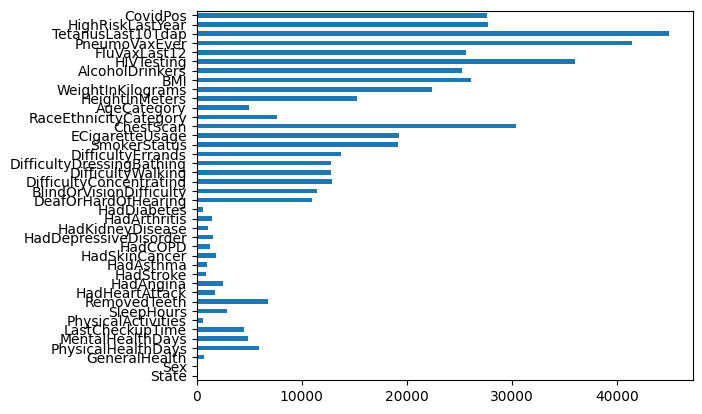

In [7]:
df.isnull().sum().plot(kind='barh')

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
--------------------------------------------------
Sex
['Female' 'Male']
--------------------------------------------------
GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
--------------------------------------------------
PhysicalHealthDays
[ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 2

In [8]:
df.dropna(inplace=True)

<ipython-input-10-603165c9a3e2>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,4))


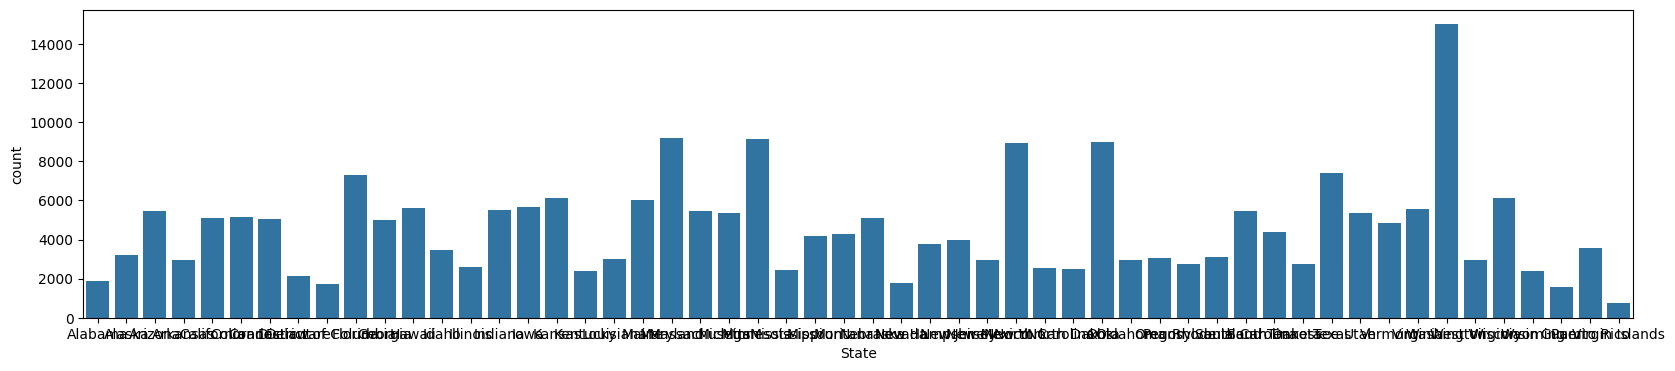

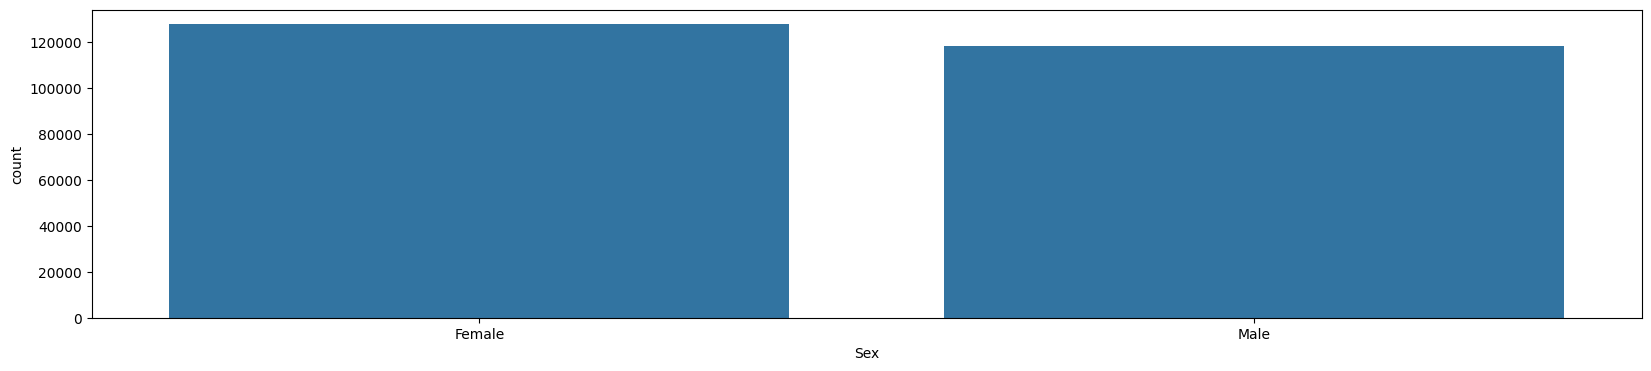

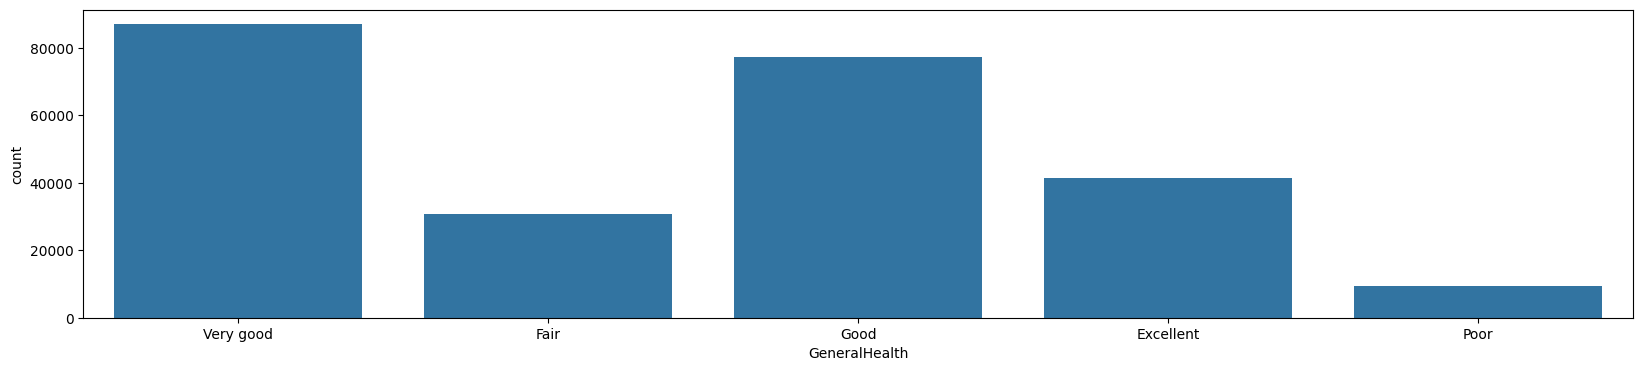

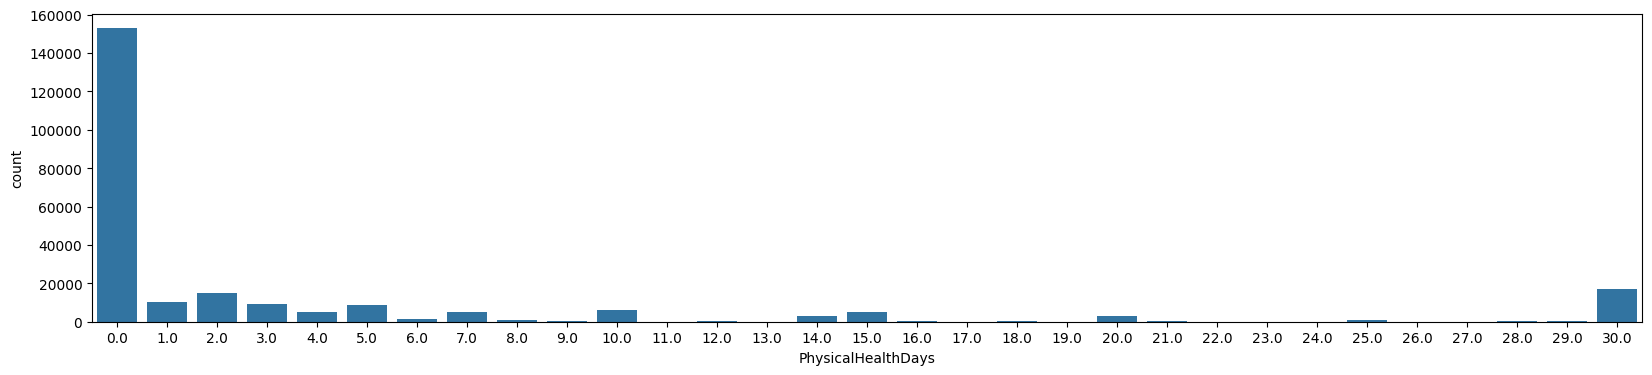

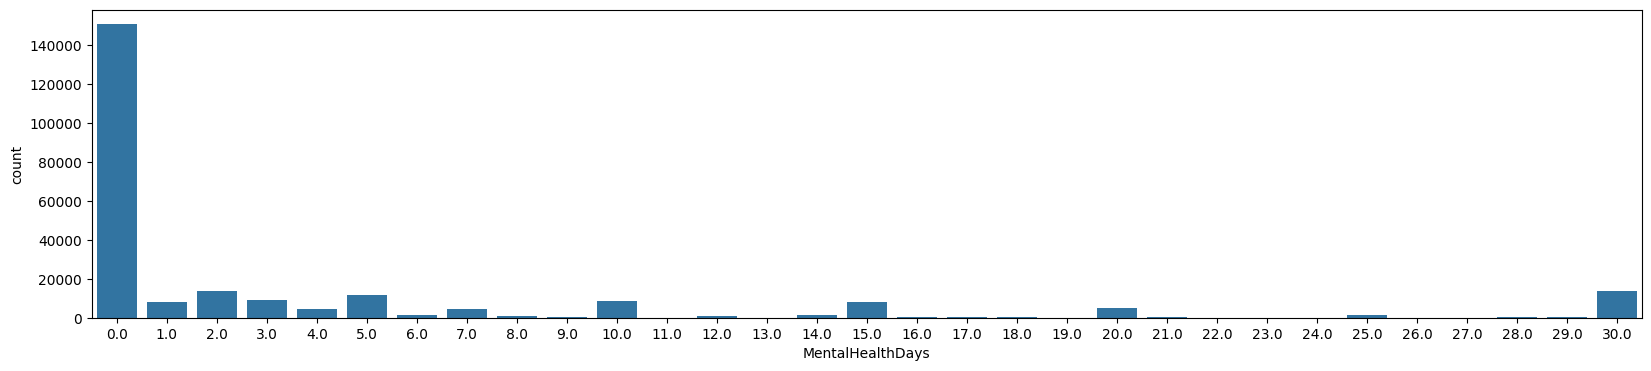

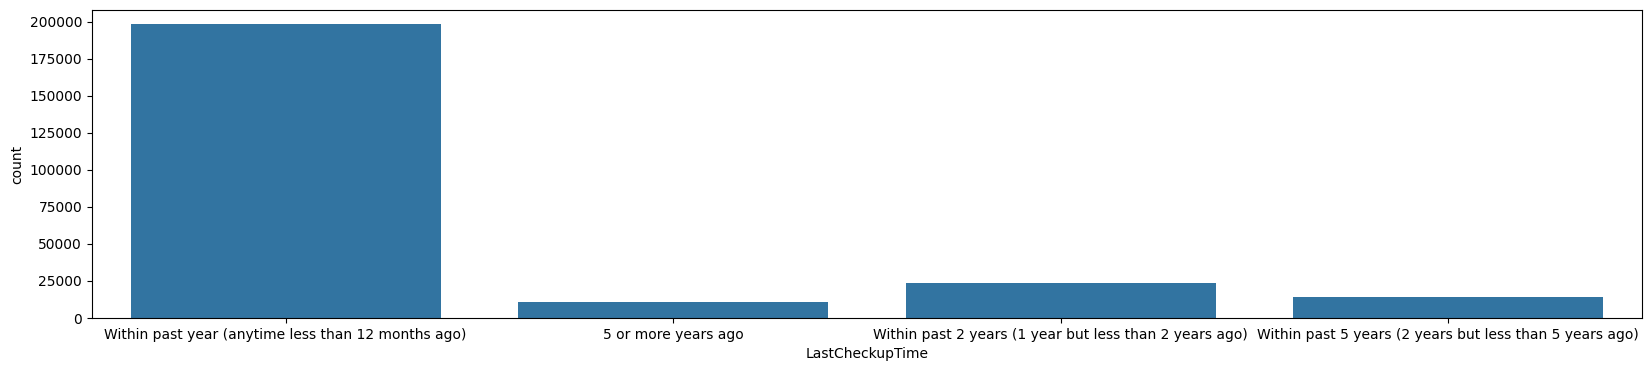

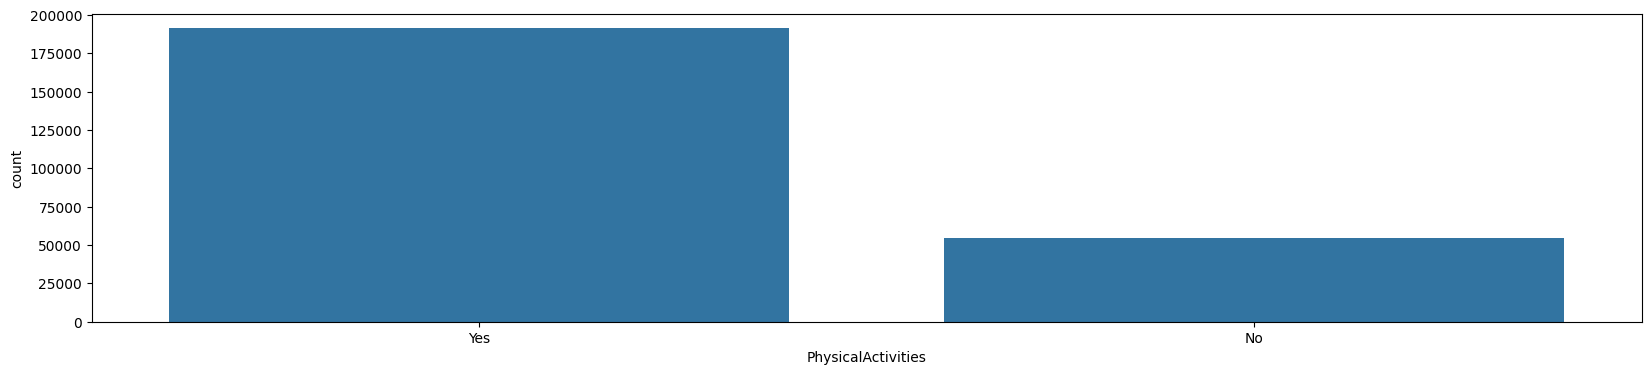

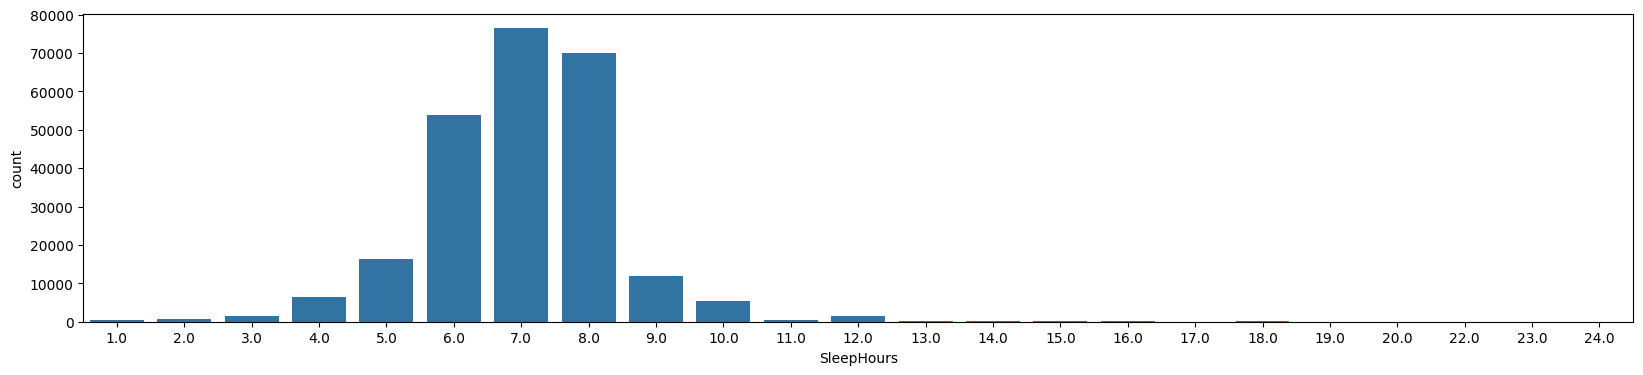

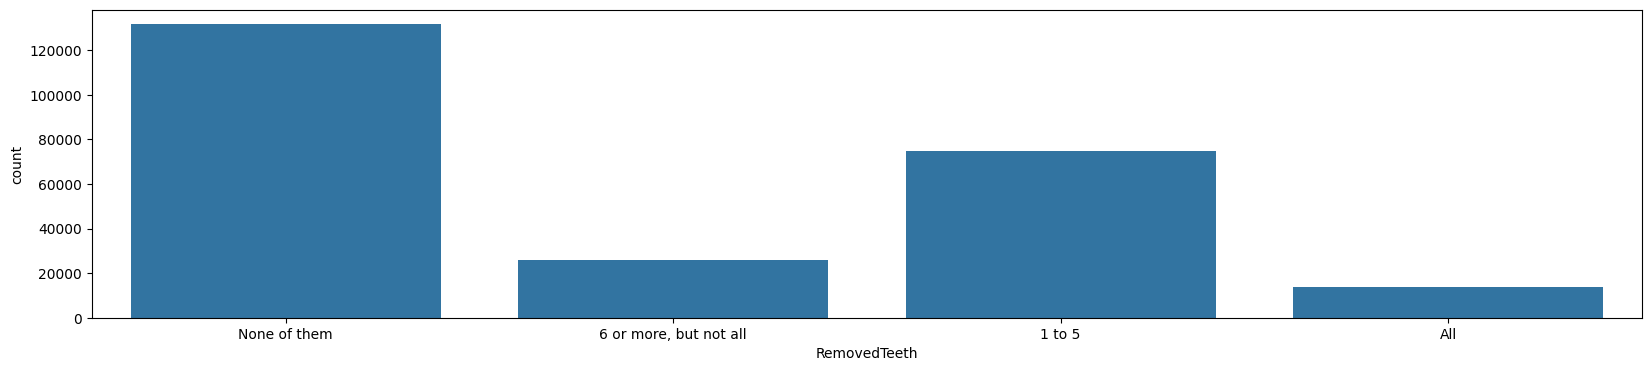

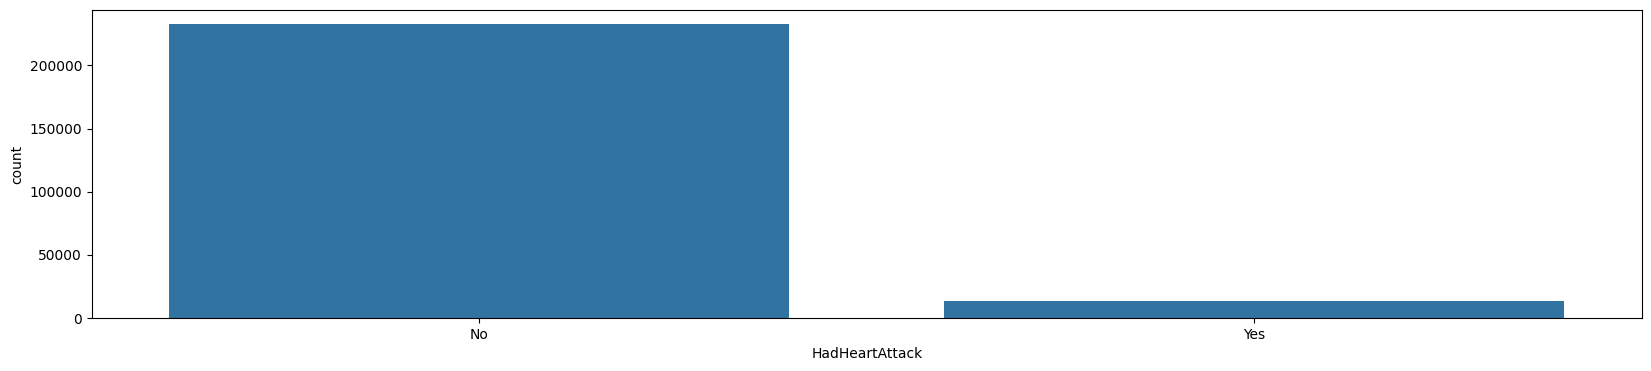

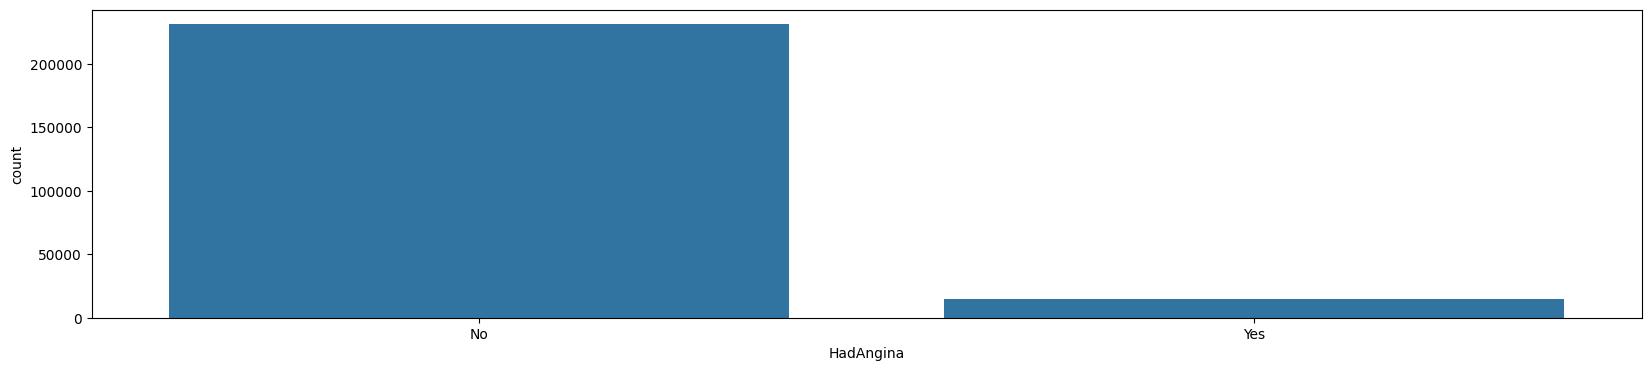

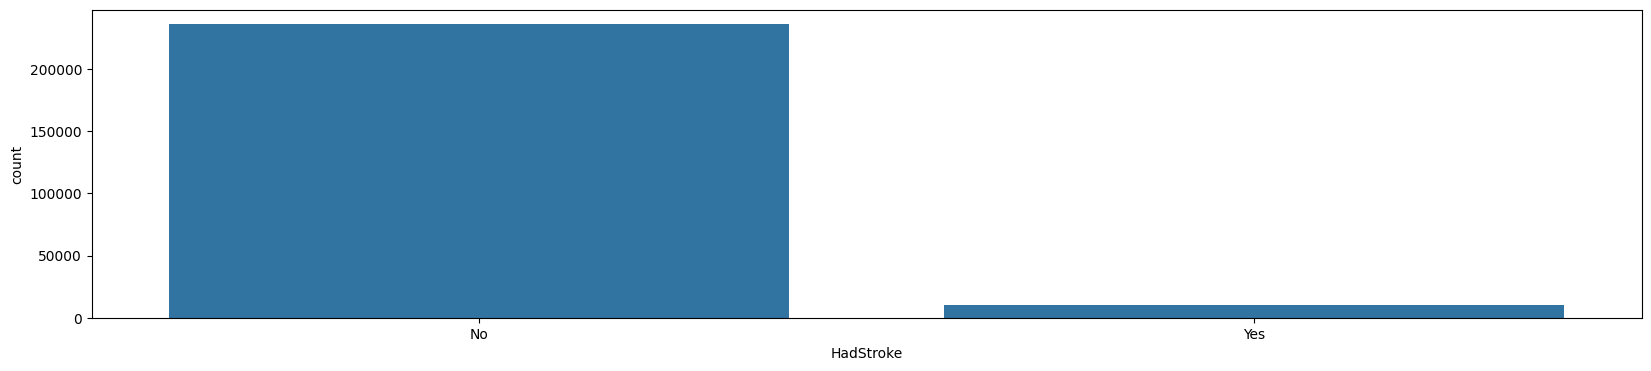

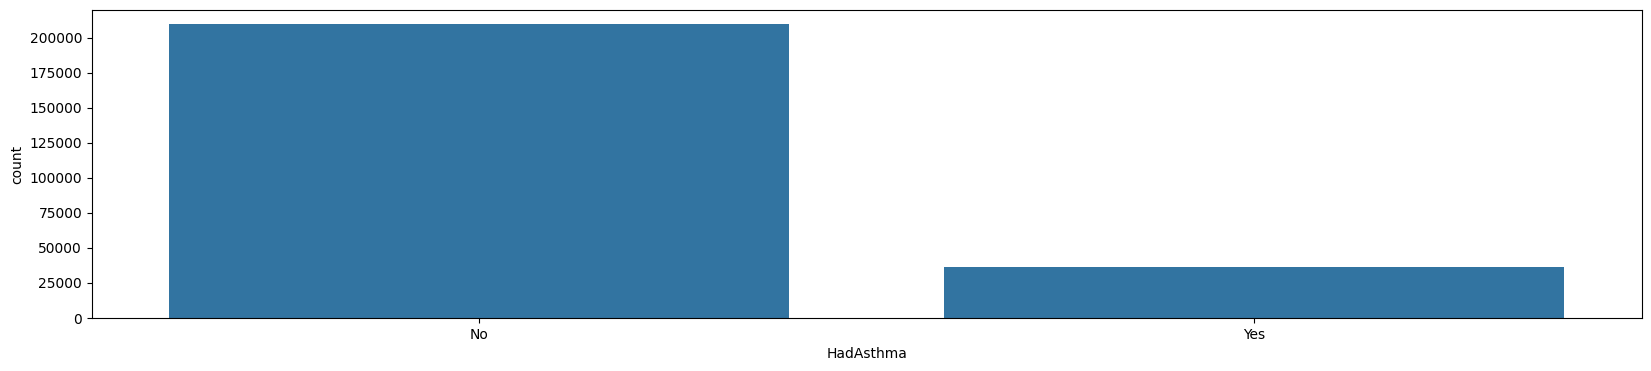

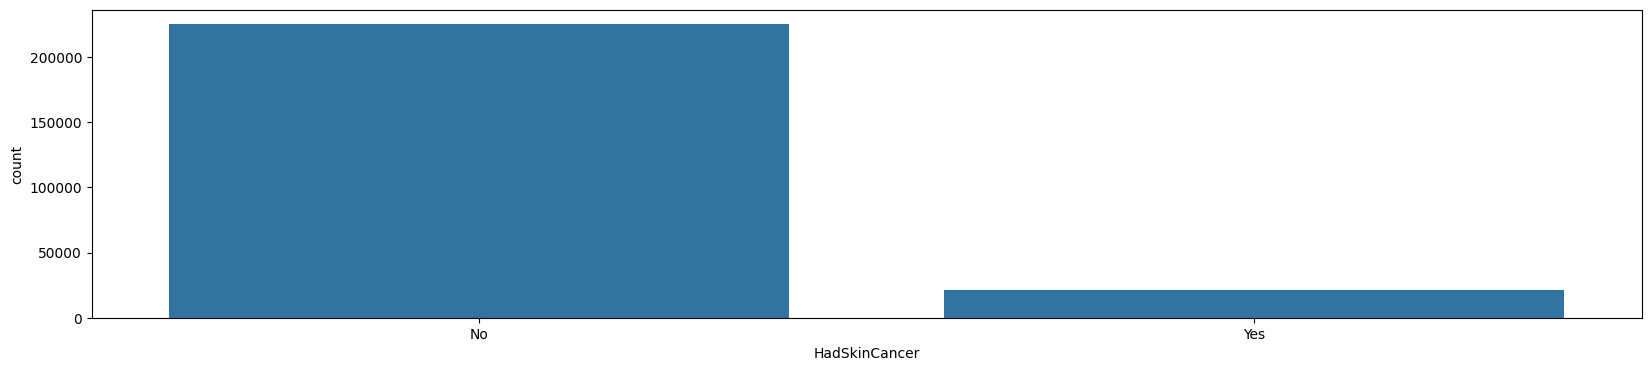

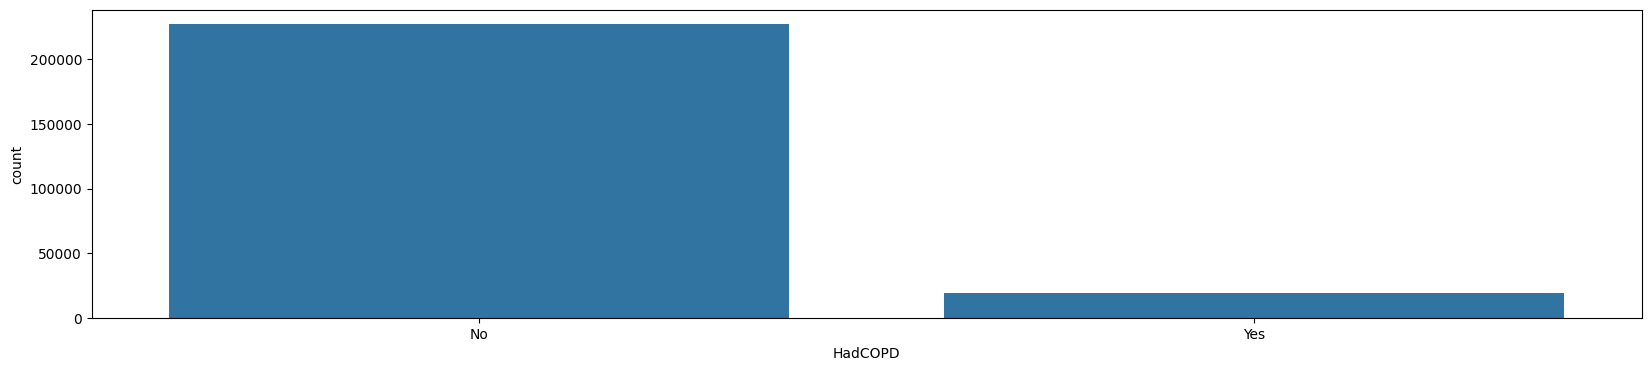

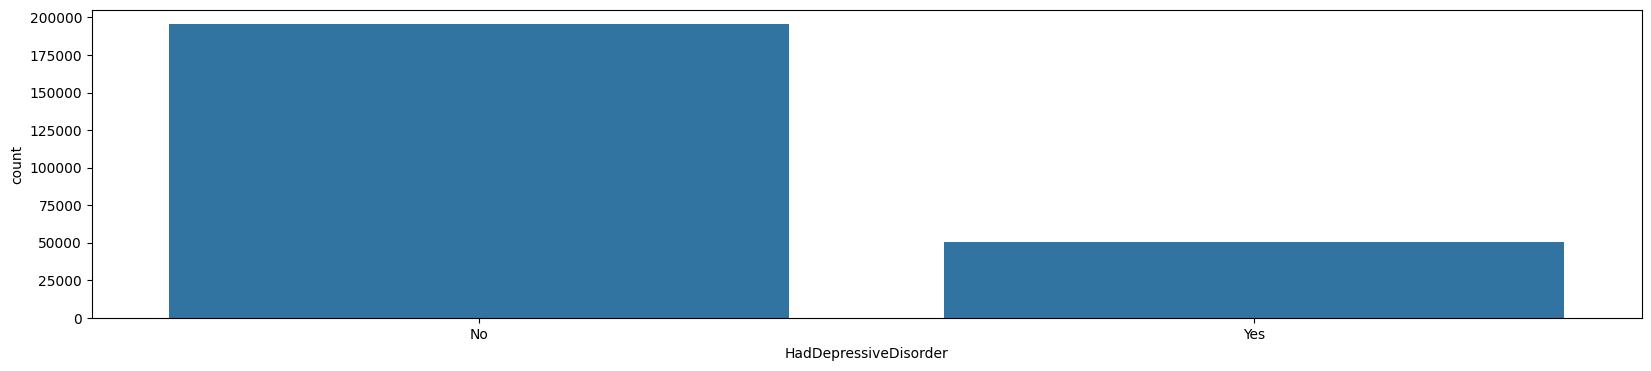

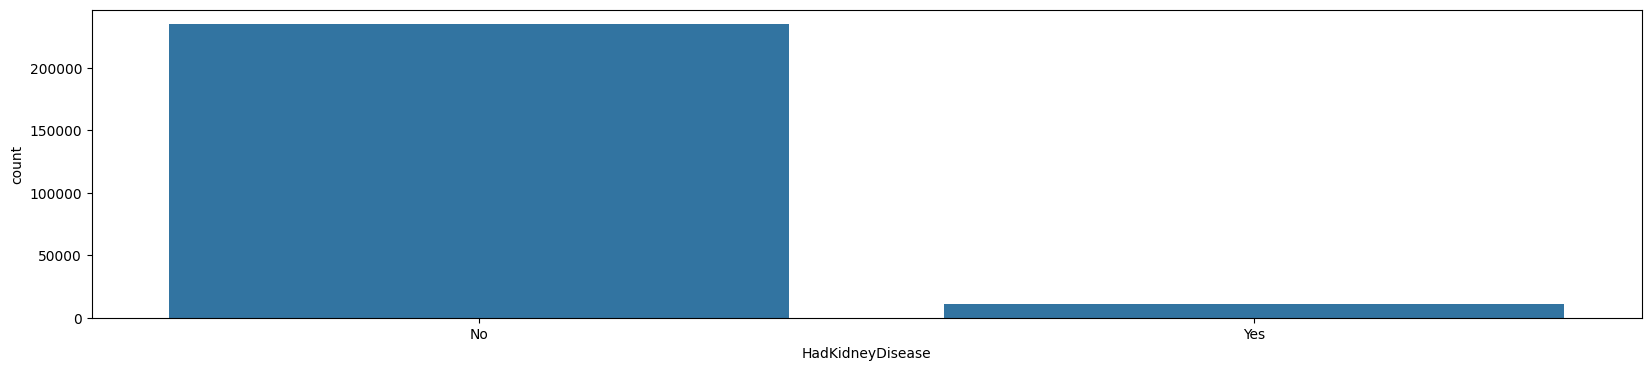

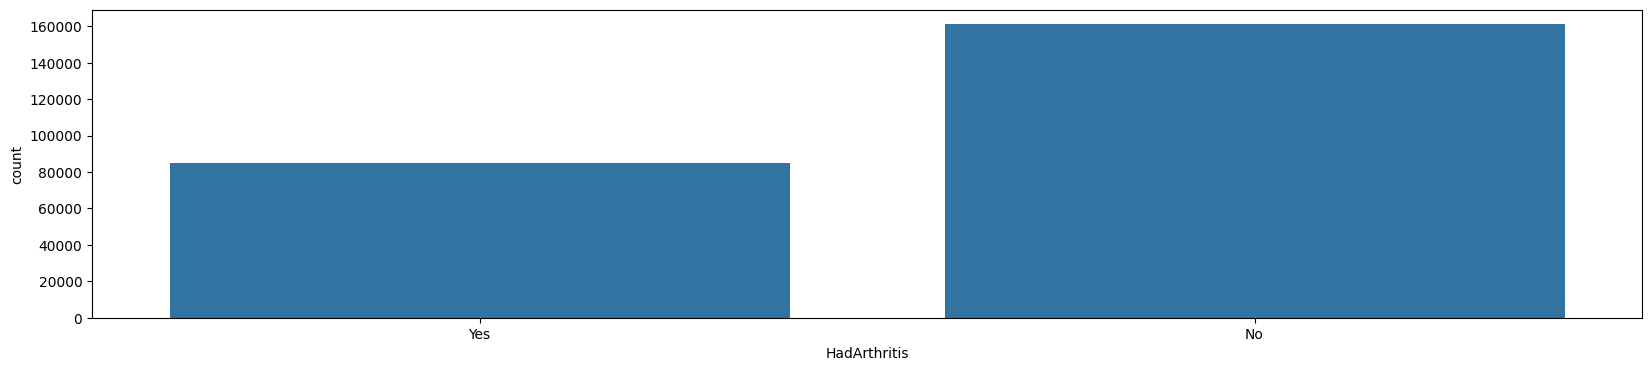

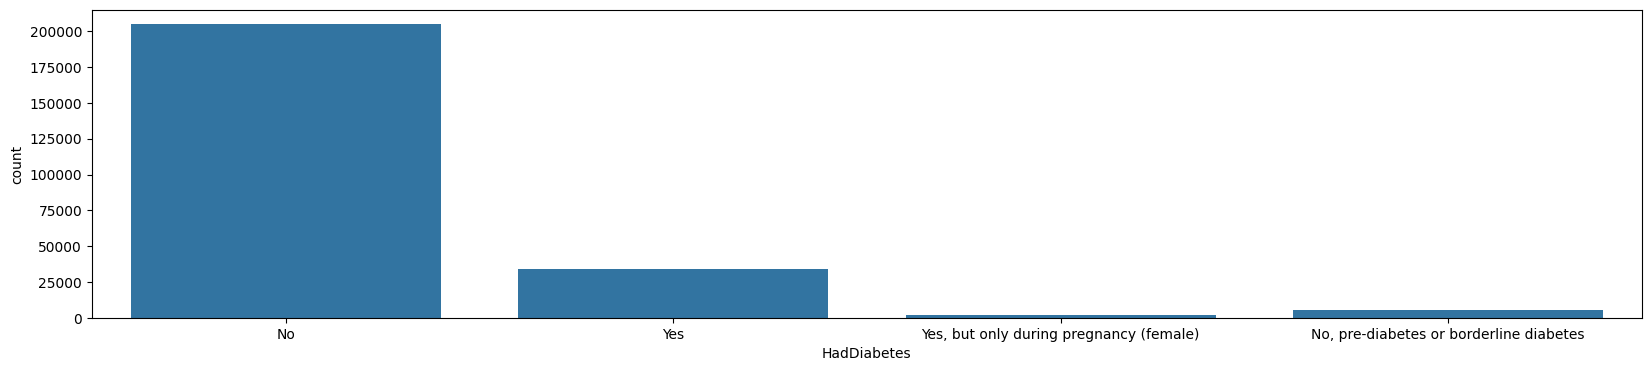

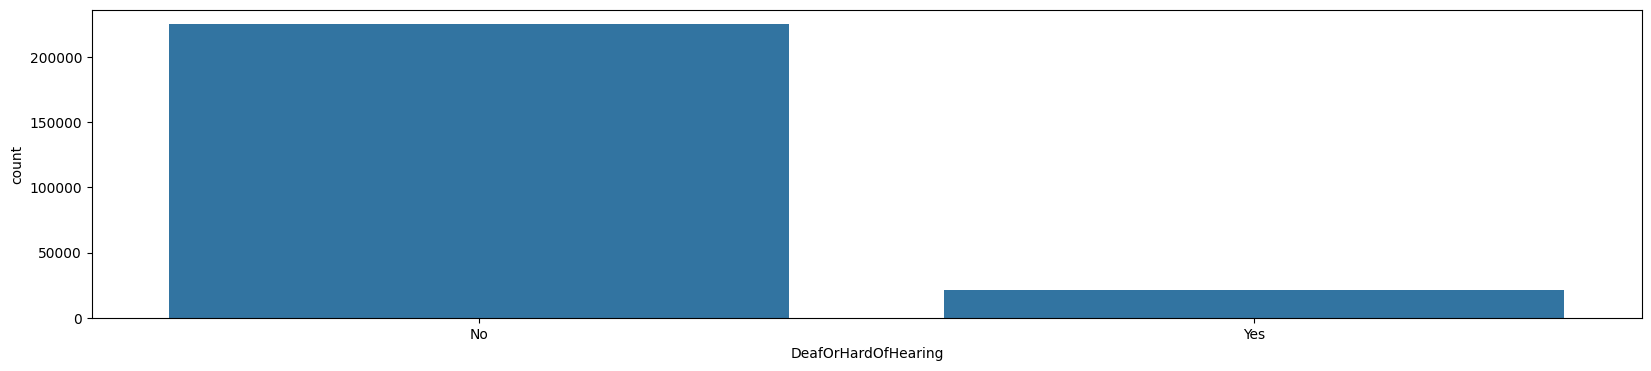

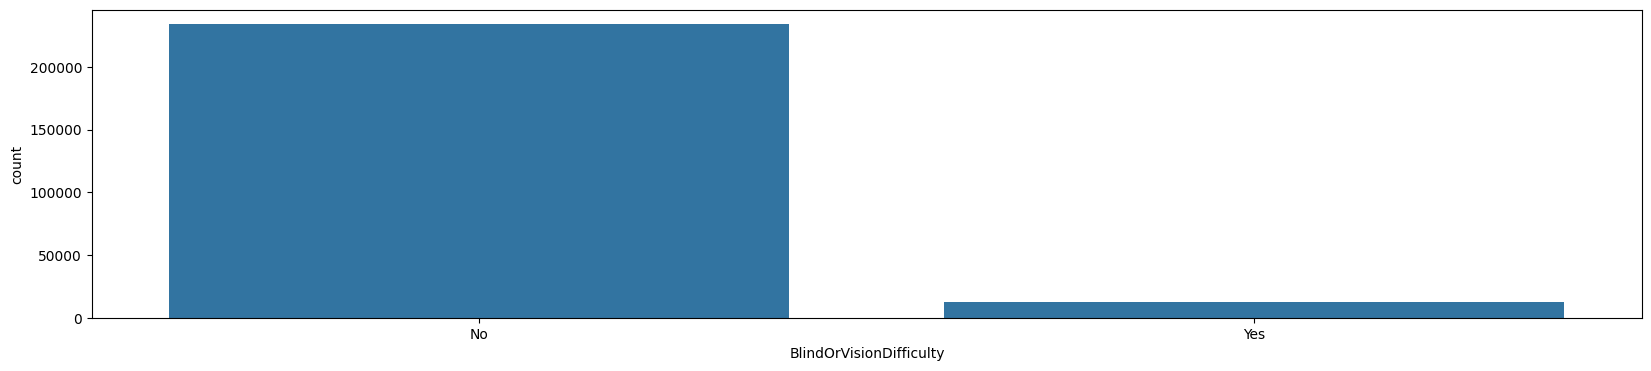

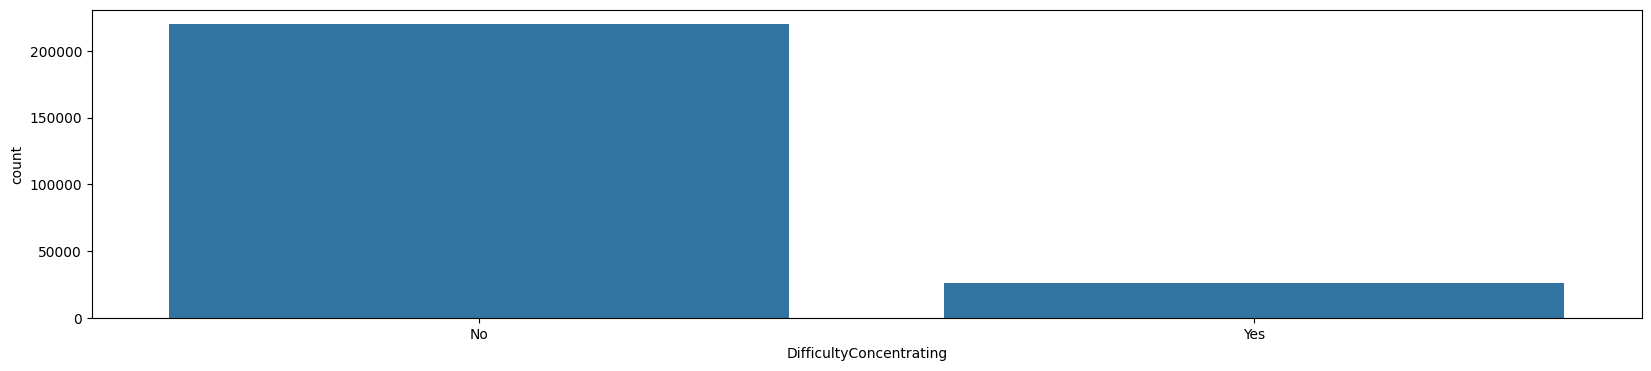

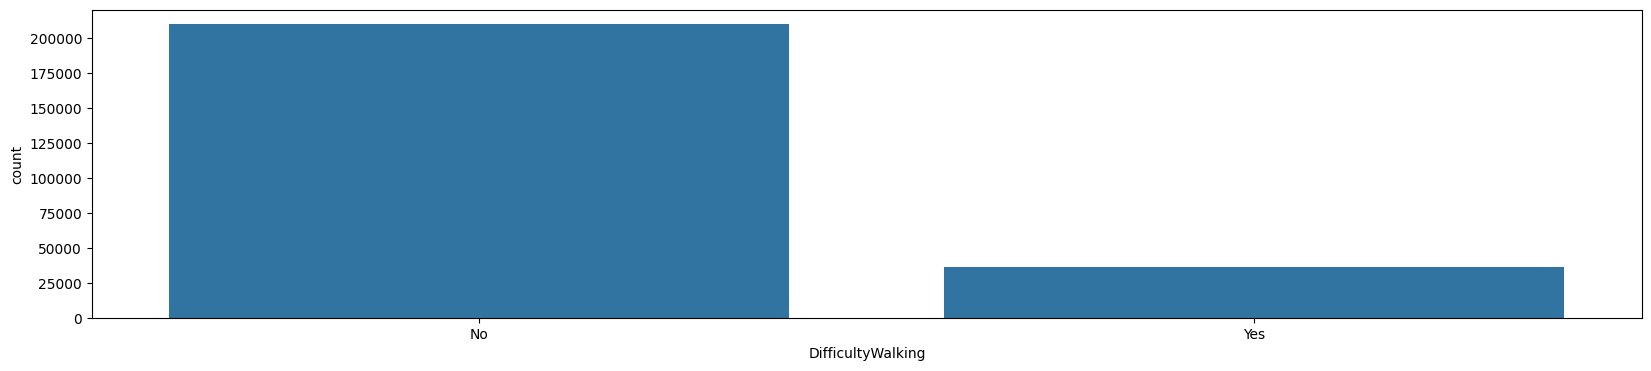

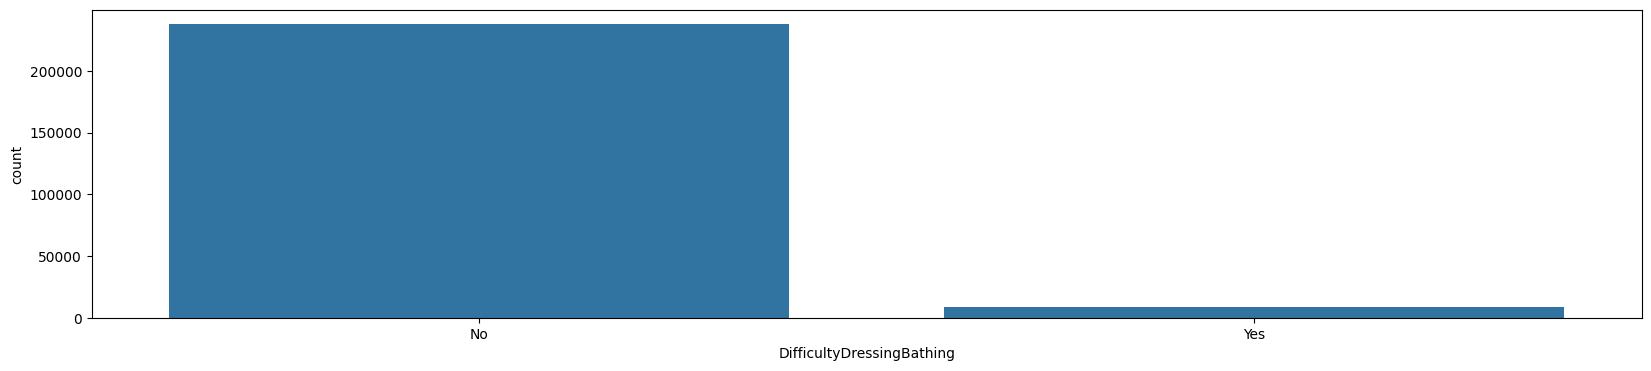

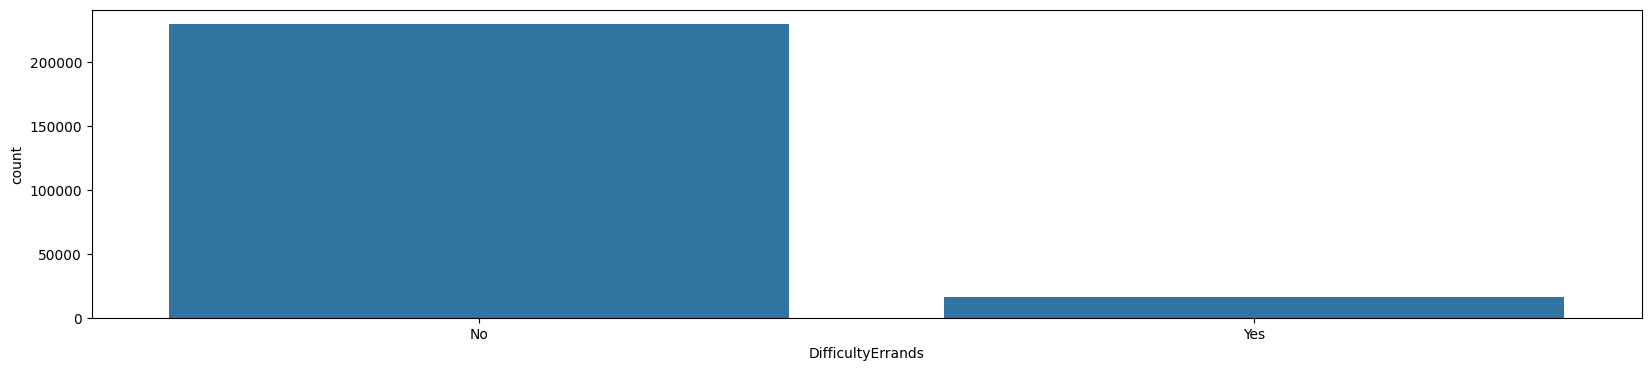

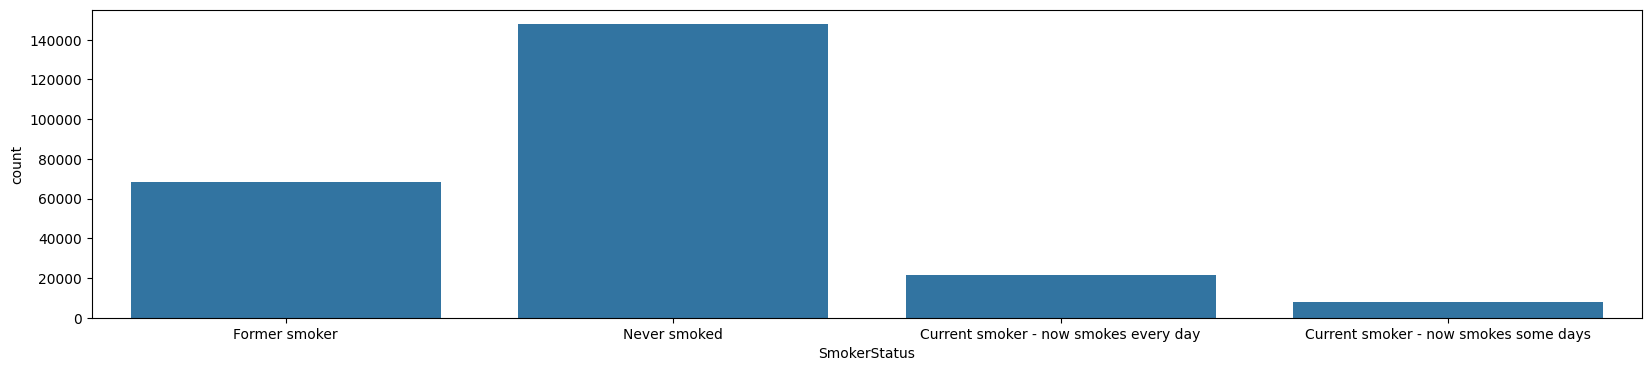

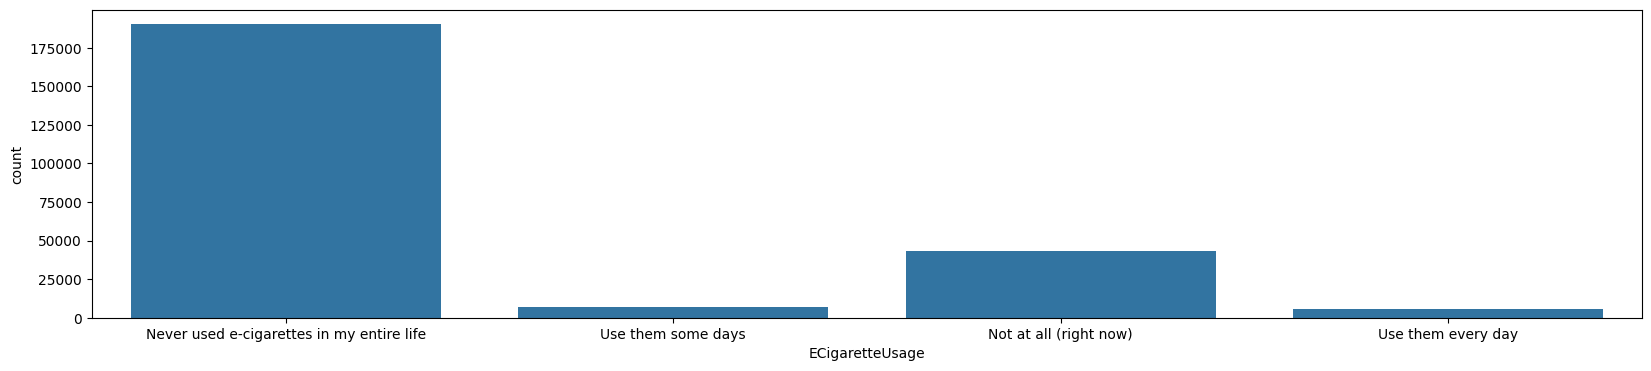

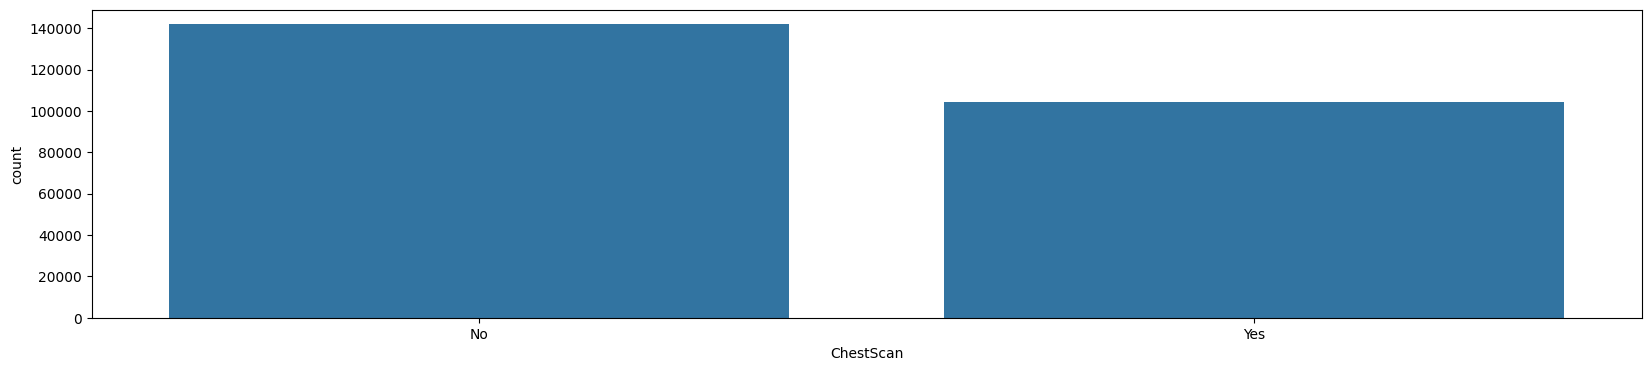

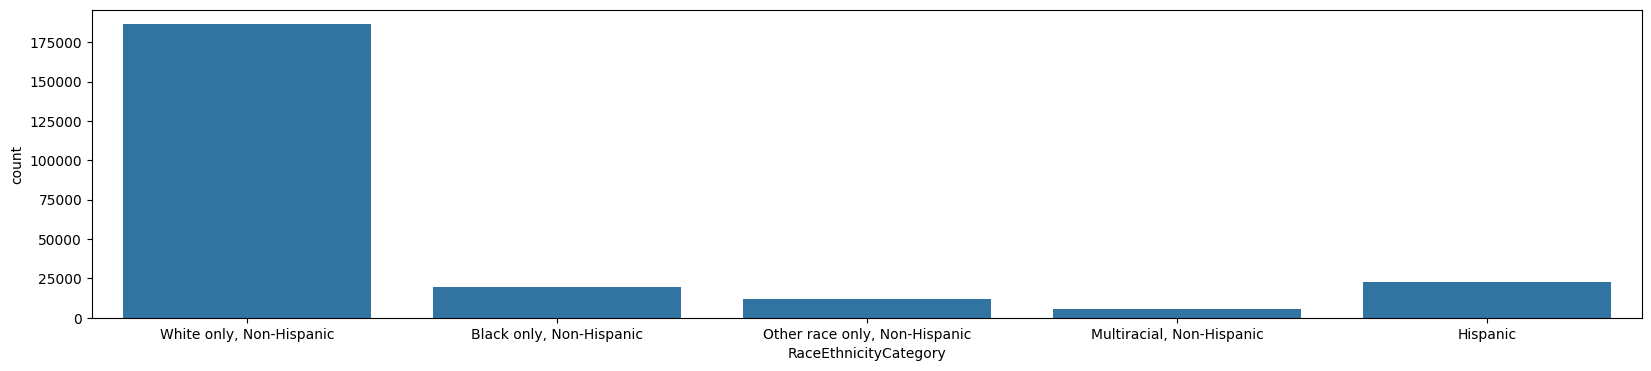

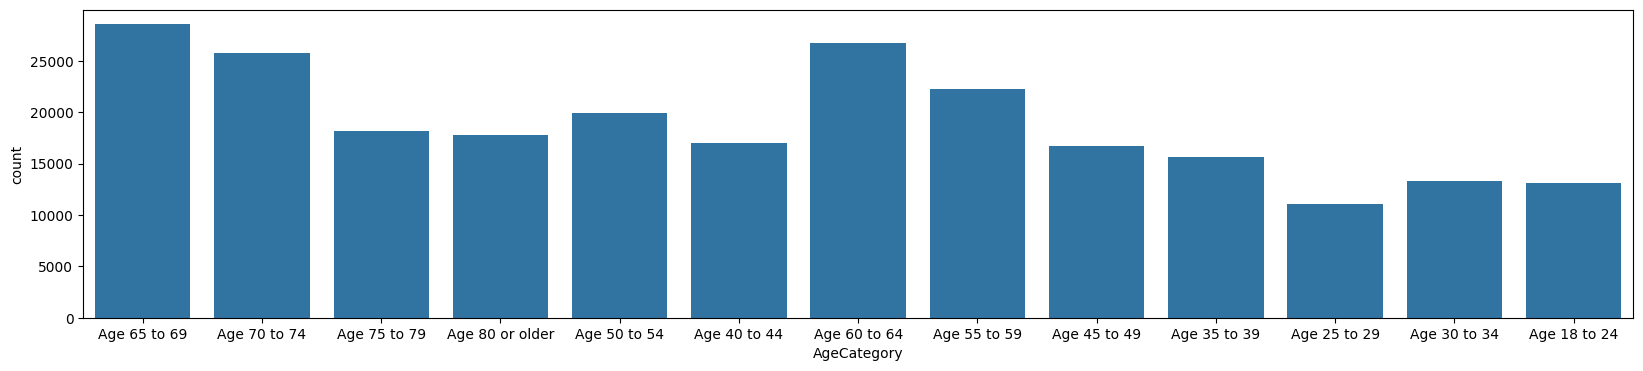

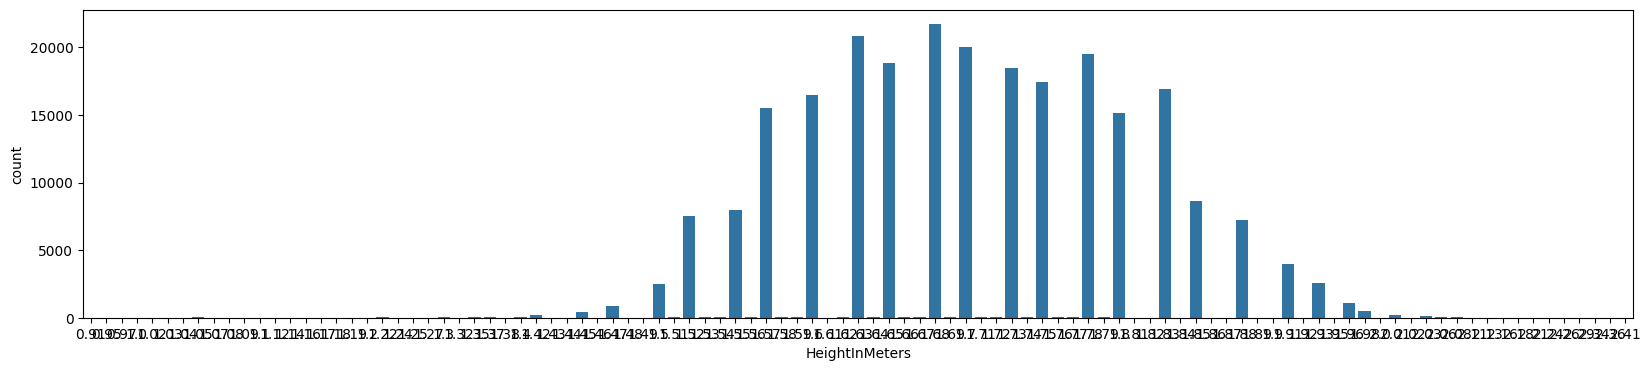

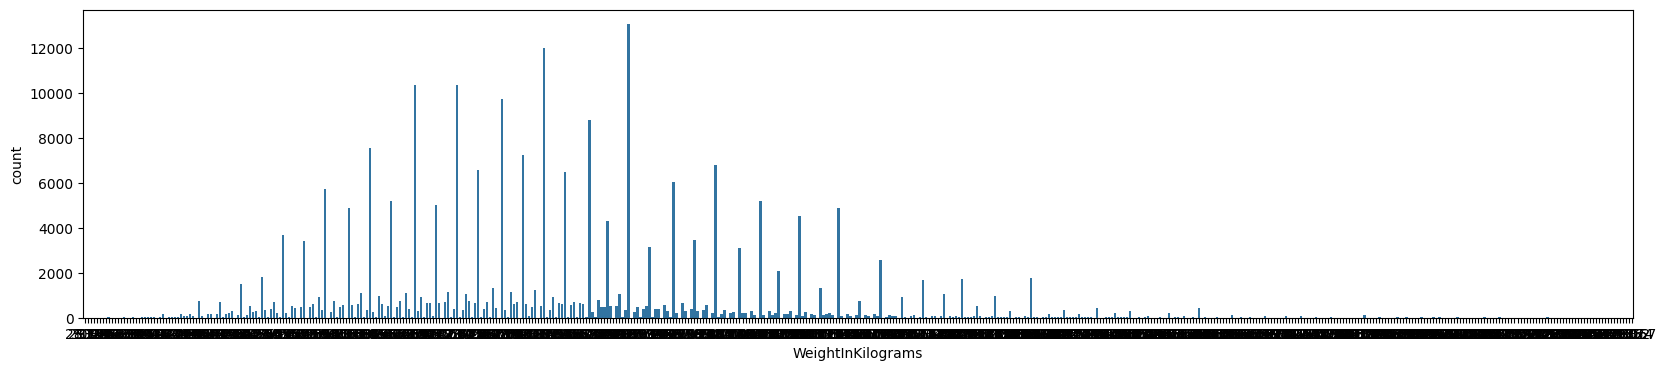

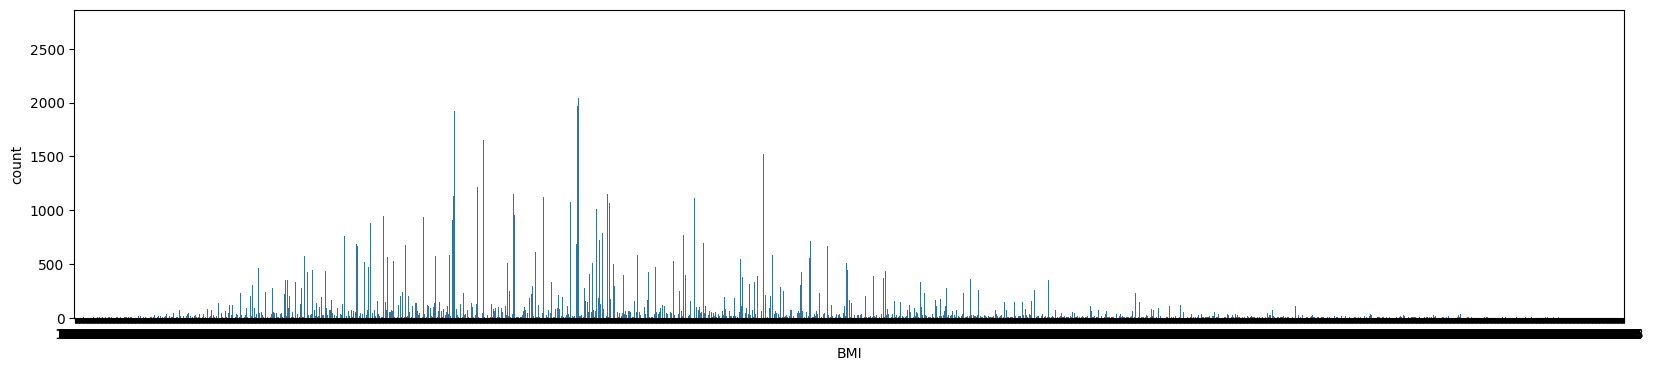

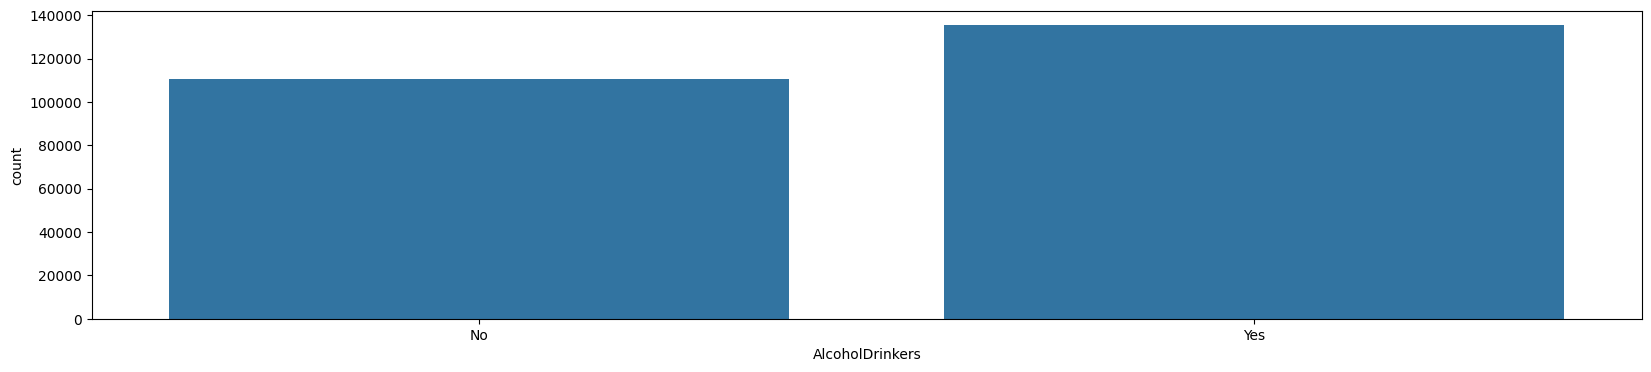

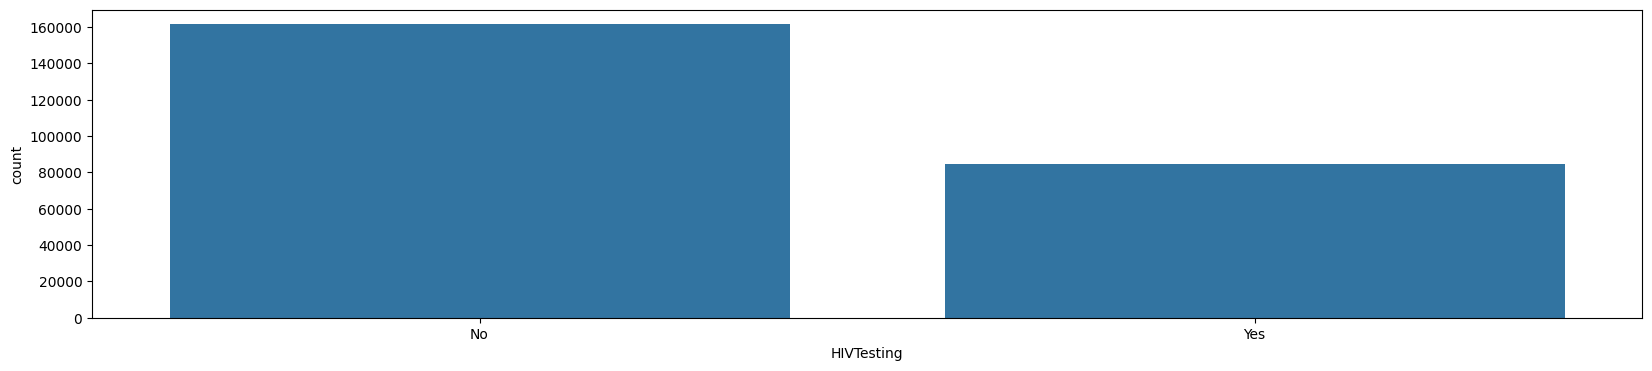

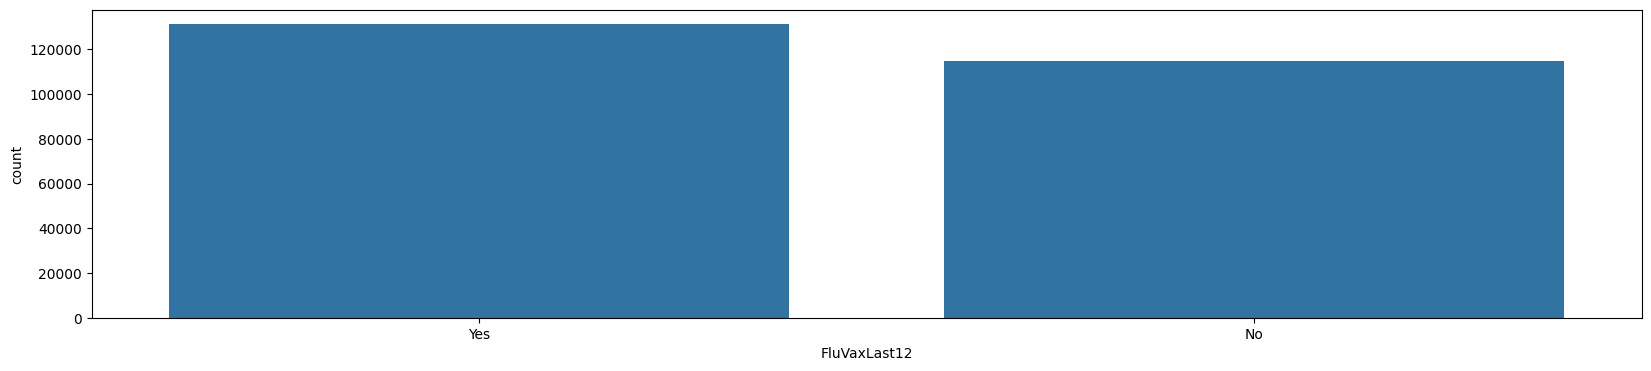

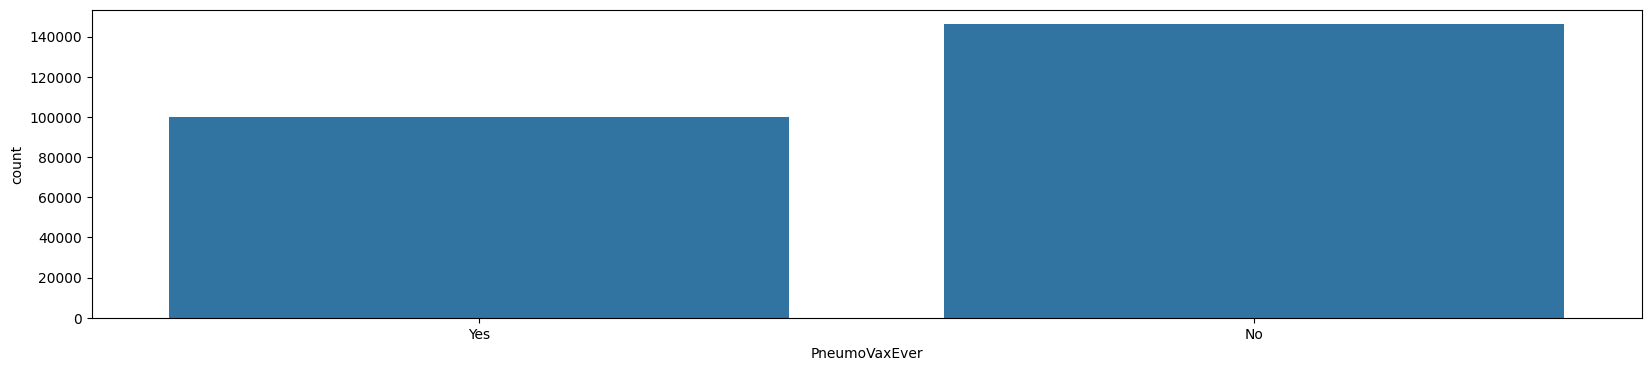

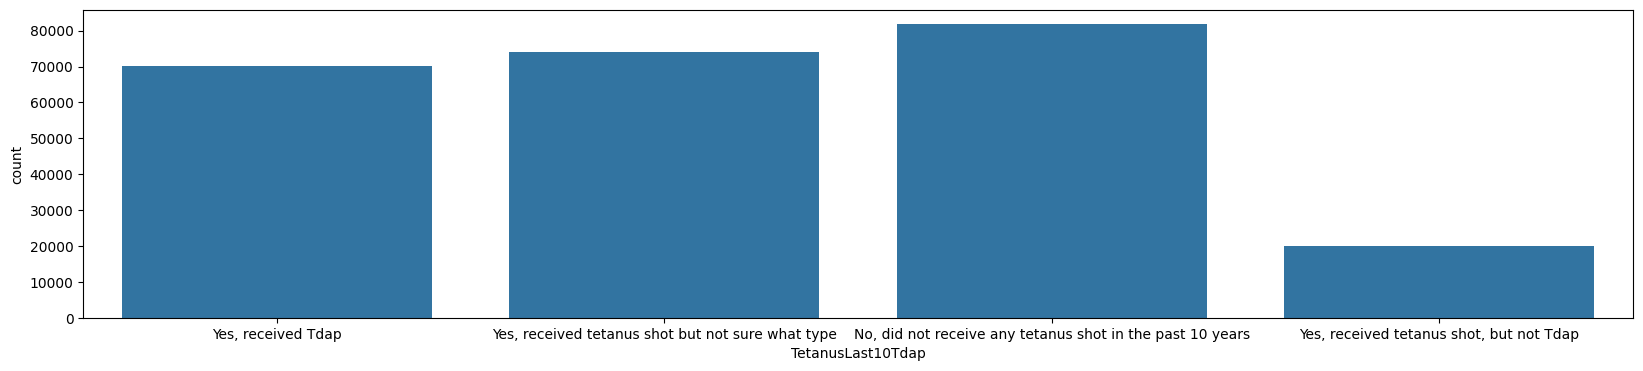

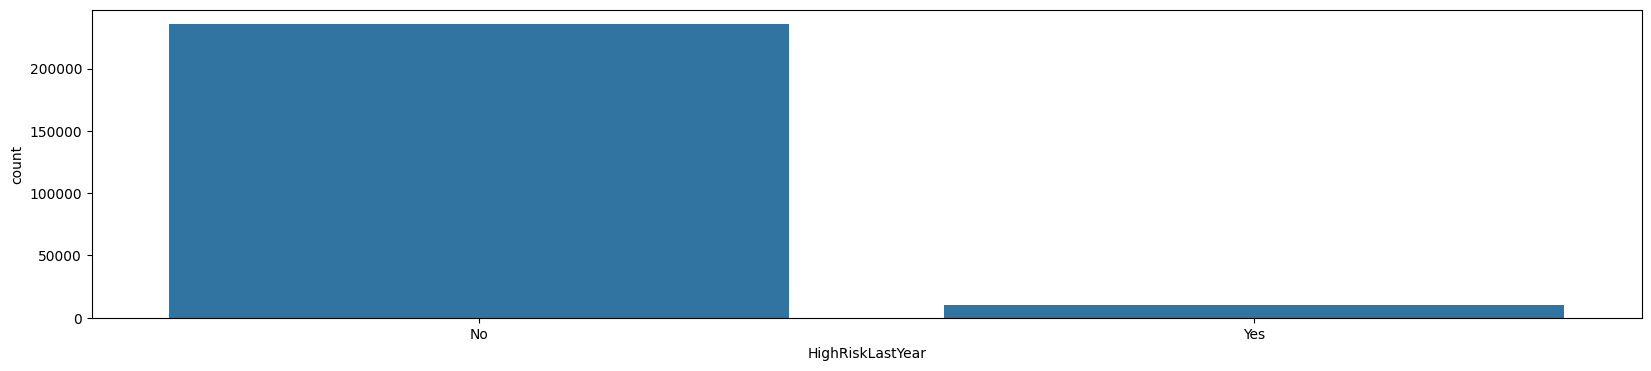

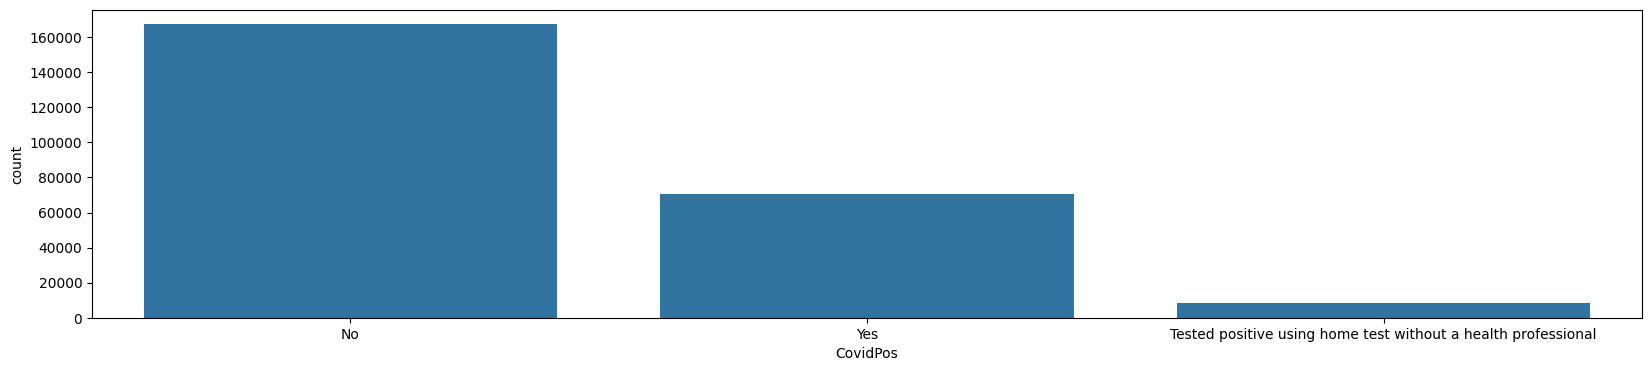

In [ ]:
for col in df.columns:
    plt.figure(figsize=(20,4))
    sns.countplot(x=df[col])

<ipython-input-11-d6709ea4bb6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

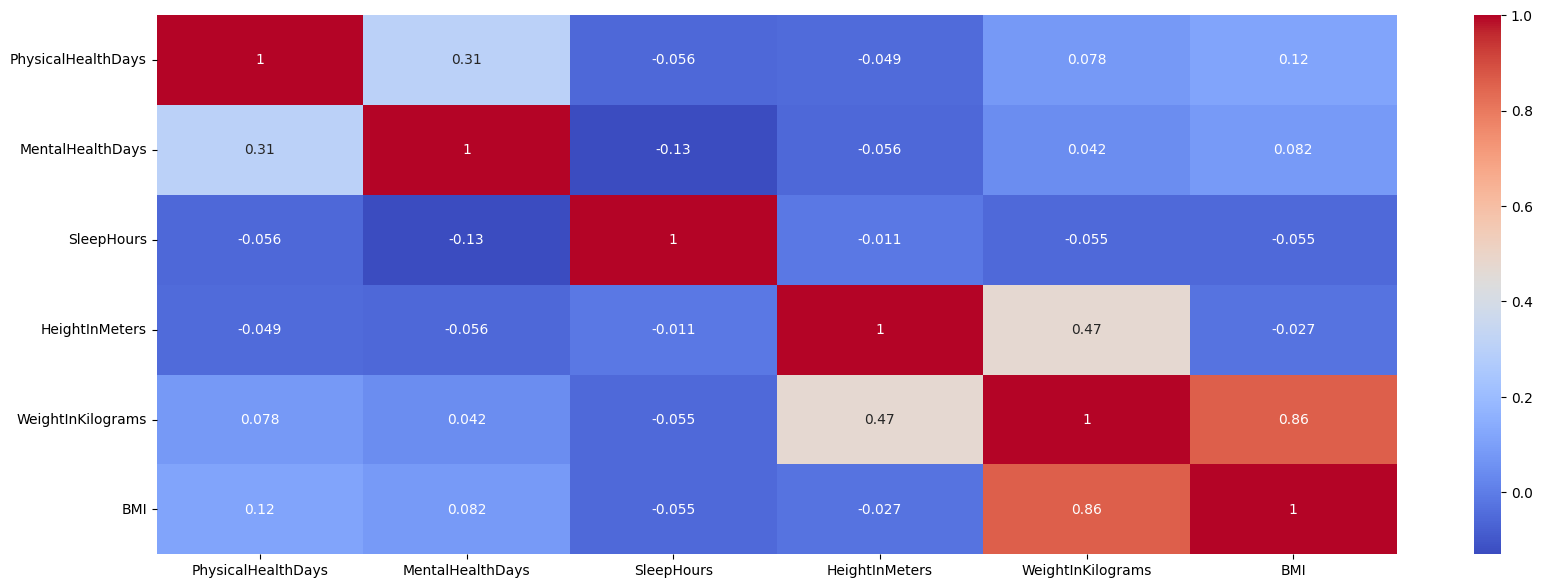

In [ ]:
correlation=df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
df['HadHeartAttack']=df['HadHeartAttack'].map({'Yes':1,'No':0})
df['HadAngina']=df['HadAngina'].map({'Yes':1,'No':0})
df['HeartDisease']=df['HadHeartAttack']|df['HadAngina']
df.drop(['HadHeartAttack','HadAngina'],axis=1,inplace=True)

In [ ]:
category_cols=df.select_dtypes(include=[object])
numeric_cols=df.select_dtypes(include=[np.number])
numeric_cols

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease
342,4.0,0.0,9.0,1.60,71.67,27.99,0
343,0.0,0.0,6.0,1.78,95.25,30.13,0
345,0.0,0.0,8.0,1.85,108.86,31.66,0
346,5.0,0.0,9.0,1.70,90.72,31.32,0
347,3.0,15.0,5.0,1.55,79.38,33.07,0
...,...,...,...,...,...,...,...
445117,0.0,0.0,6.0,1.78,102.06,32.28,0
445123,0.0,7.0,7.0,1.93,90.72,24.34,0
445124,0.0,15.0,7.0,1.68,83.91,29.86,0
445128,2.0,2.0,7.0,1.70,83.01,28.66,0


Text(0.5, 1.0, 'Heart Disease Distribution')

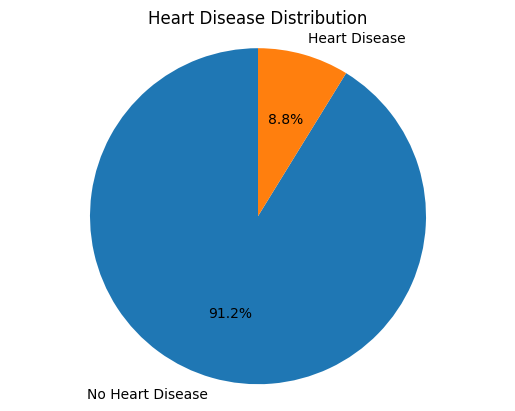

In [ ]:
heart_disease_counts=df['HeartDisease'].value_counts()
fig,ax=plt.subplots()
ax.pie(heart_disease_counts,labels=['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle=90)
ax.axis('equal')
plt.title('Heart Disease Distribution')

In [9]:
ages = {
    'Age 80 or older': 80,
    'Age 55 to 59': 55,
    'Age 40 to 44': 40,
    'Age 75 to 79': 75,
    'Age 70 to 74': 70,
    'Age 65 to 69': 65,
    'Age 60 to 64': 60,
    'Age 50 to 54': 50,
    'Age 45 to 49': 45,
    'Age 35 to 39': 35,
    'Age 25 to 29': 25,
    'Age 30 to 34': 30,
    'Age 18 to 24': 18
}

df['AgeCategory'] = df['AgeCategory'].map(lambda x: ages[x])

In [10]:
numeric_cols=[]
category_cols=[]
for col in df.columns:
    if df[col].dtype=='object':
        category_cols.append(col)
    else:
        numeric_cols.append(col)

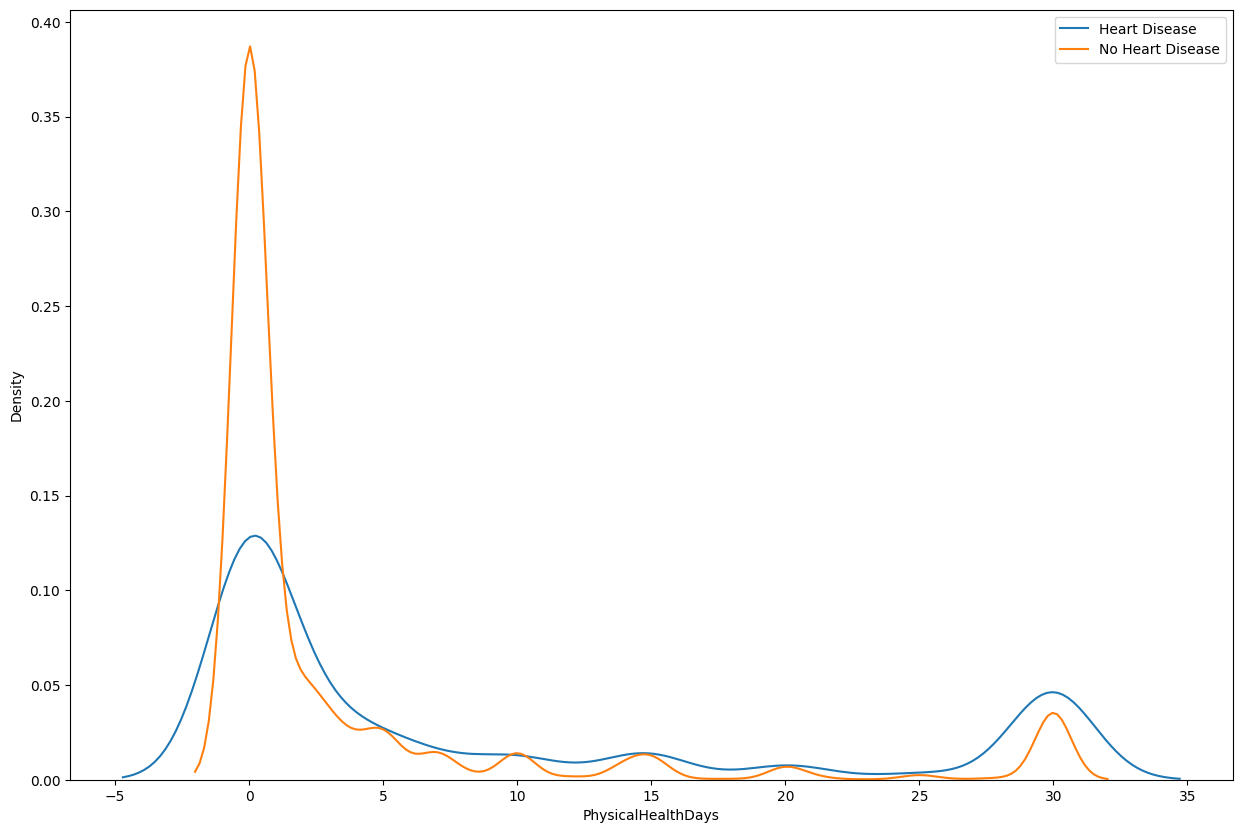

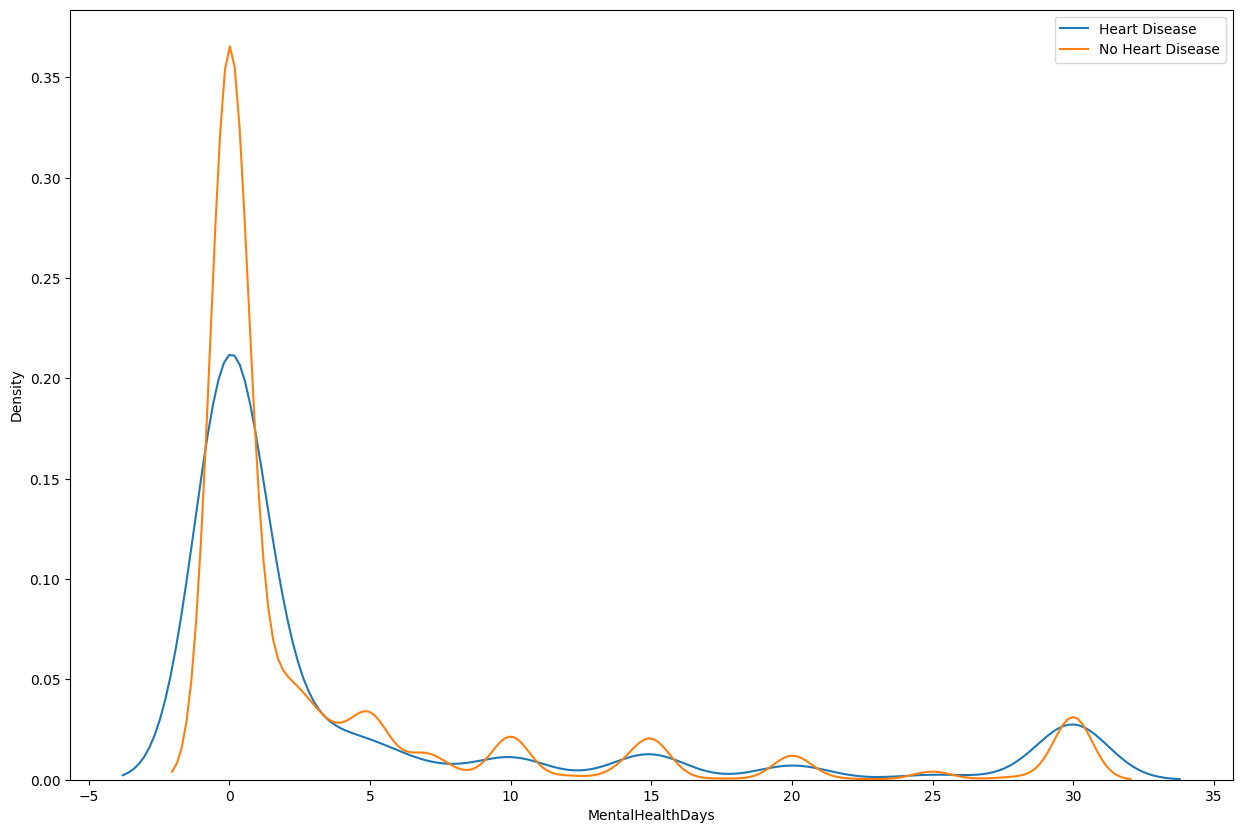

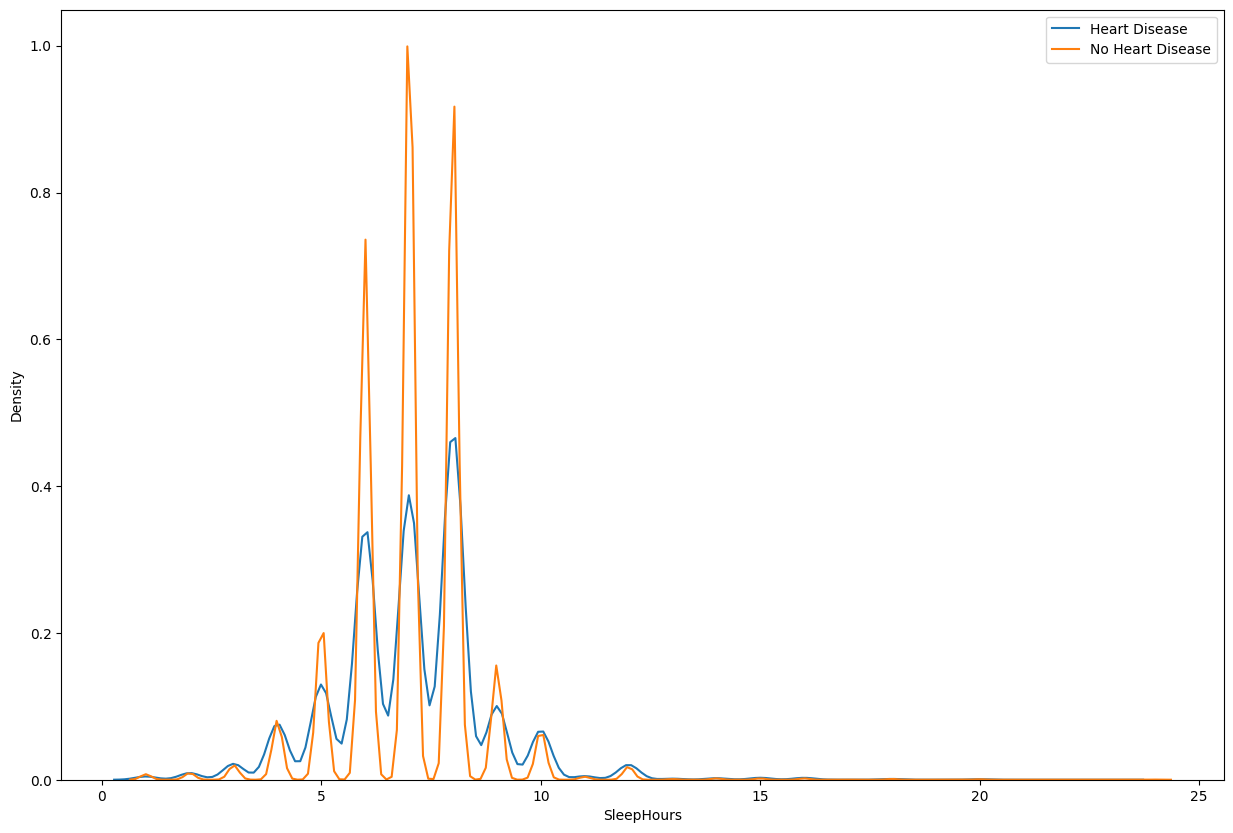

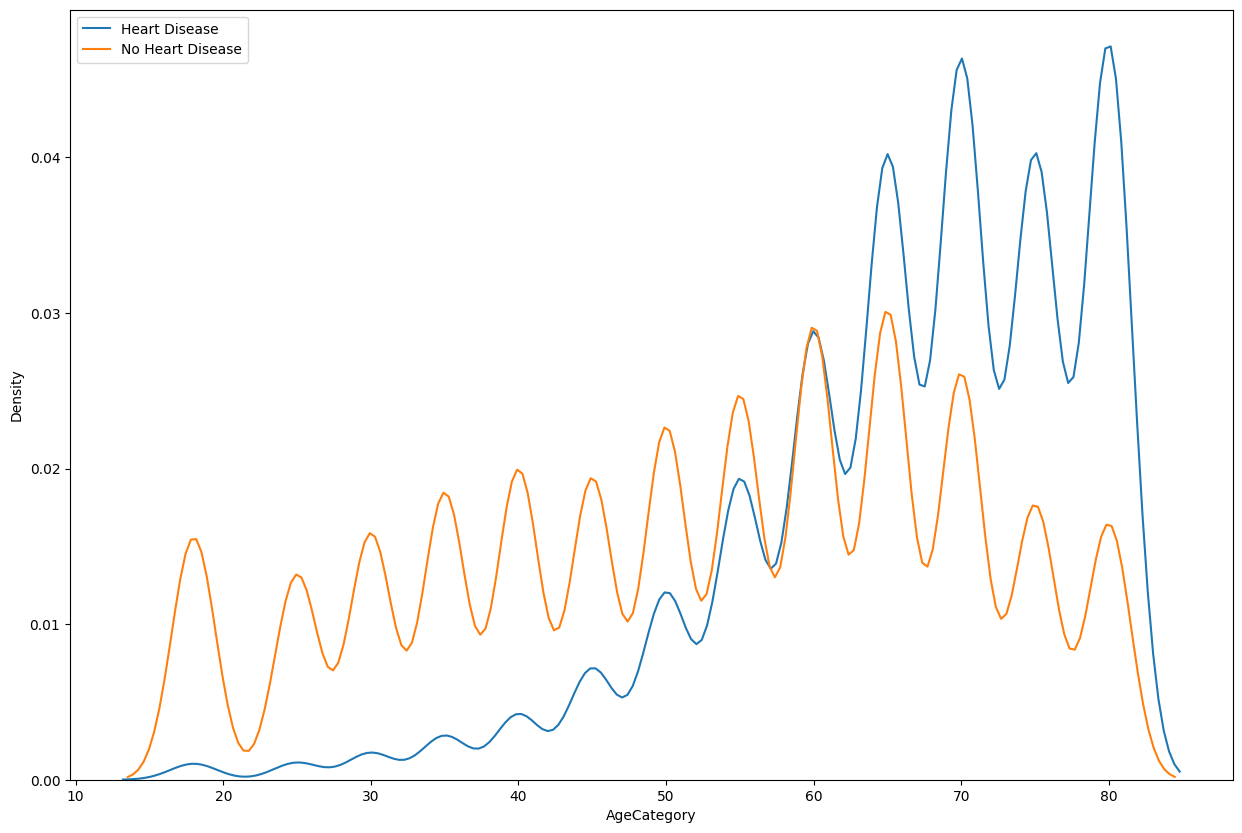

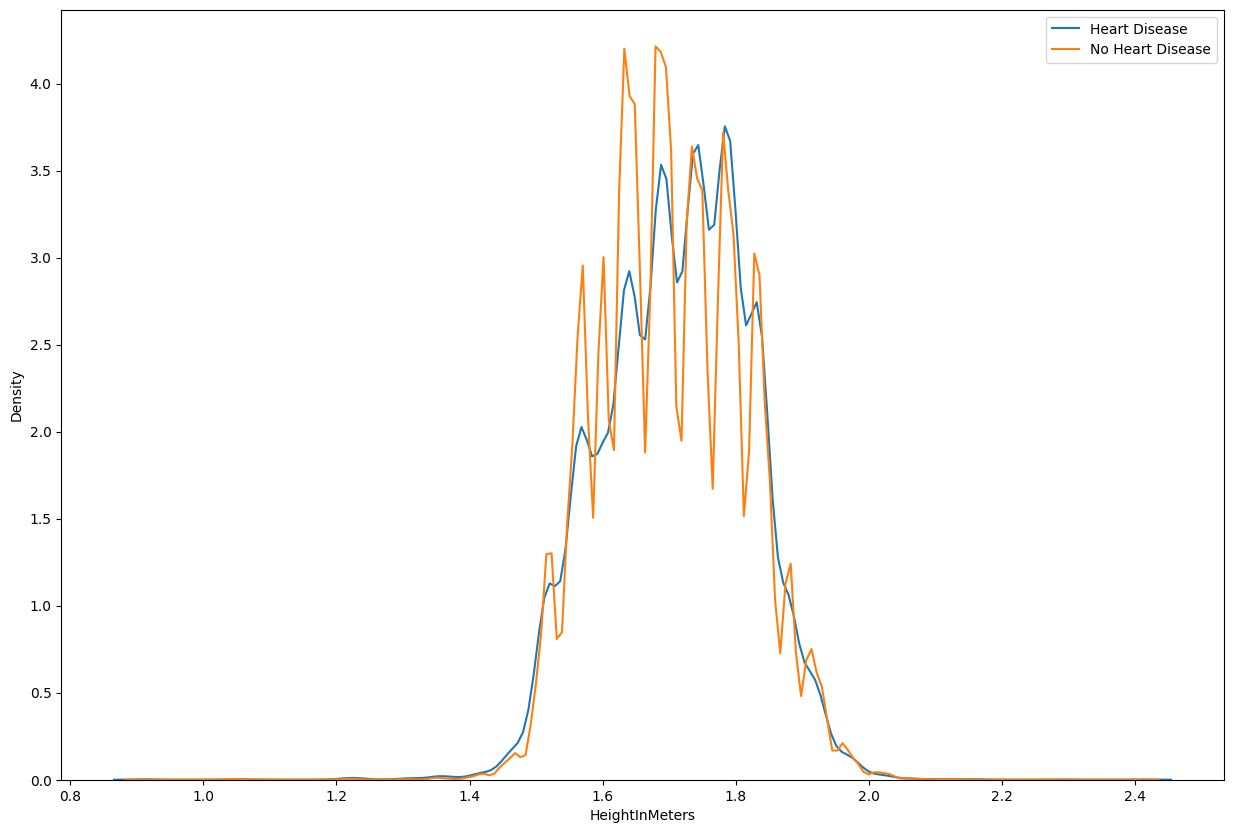

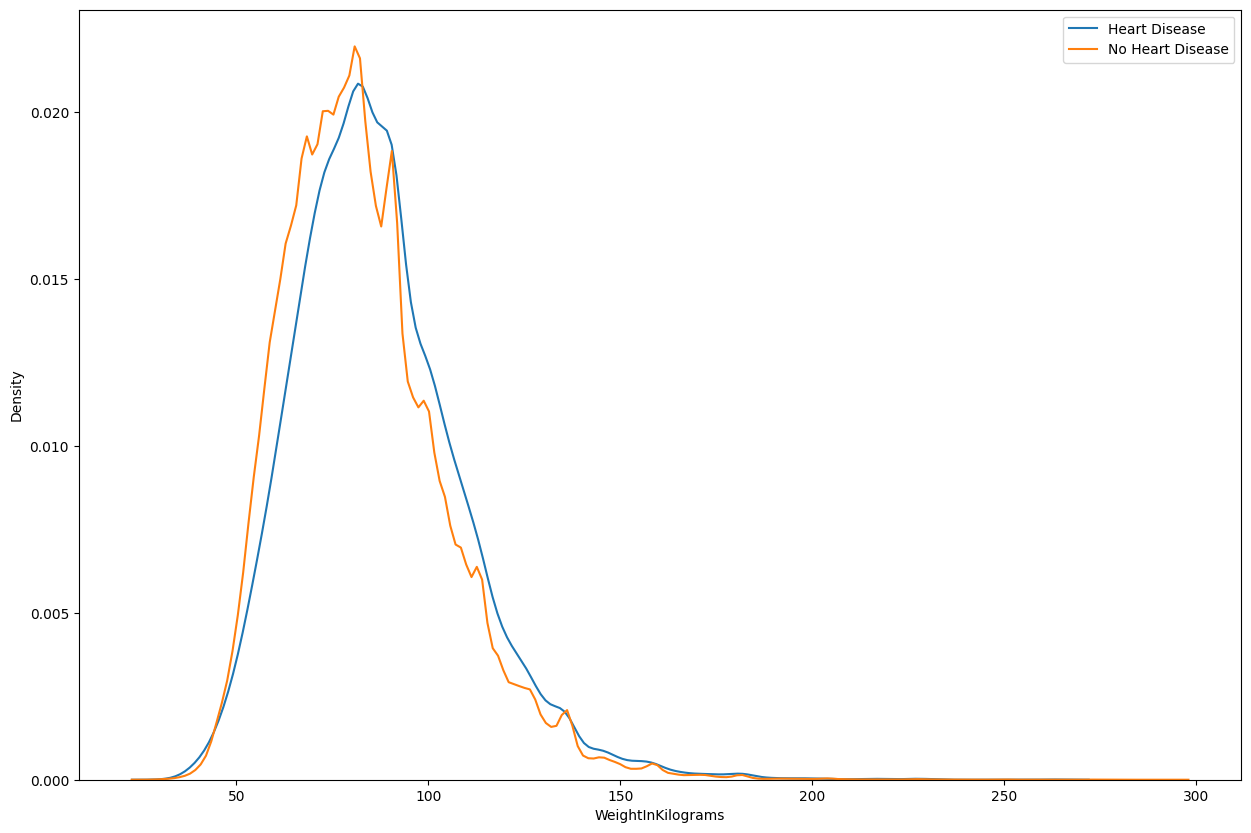

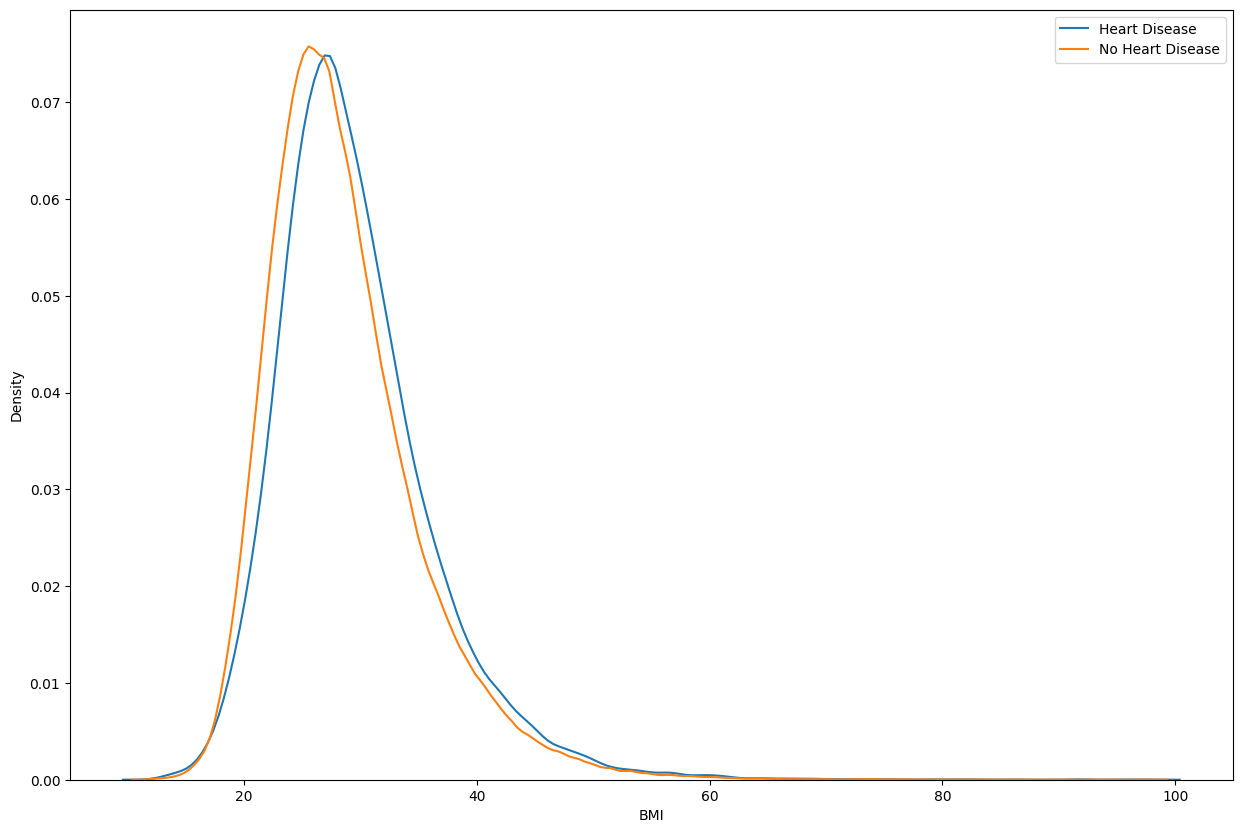

In [ ]:
for col in numeric_cols[:-1]:
    f,ax=plt.subplots(1,figsize=(15,10))
    sns.kdeplot(df[df['HeartDisease']==1][col],ax=ax)
    sns.kdeplot(df[df['HeartDisease']==0][col],ax=ax)
    plt.legend(labels=['Heart Disease', 'No Heart Disease'])

<ipython-input-18-5ee8a80bb27e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,6))


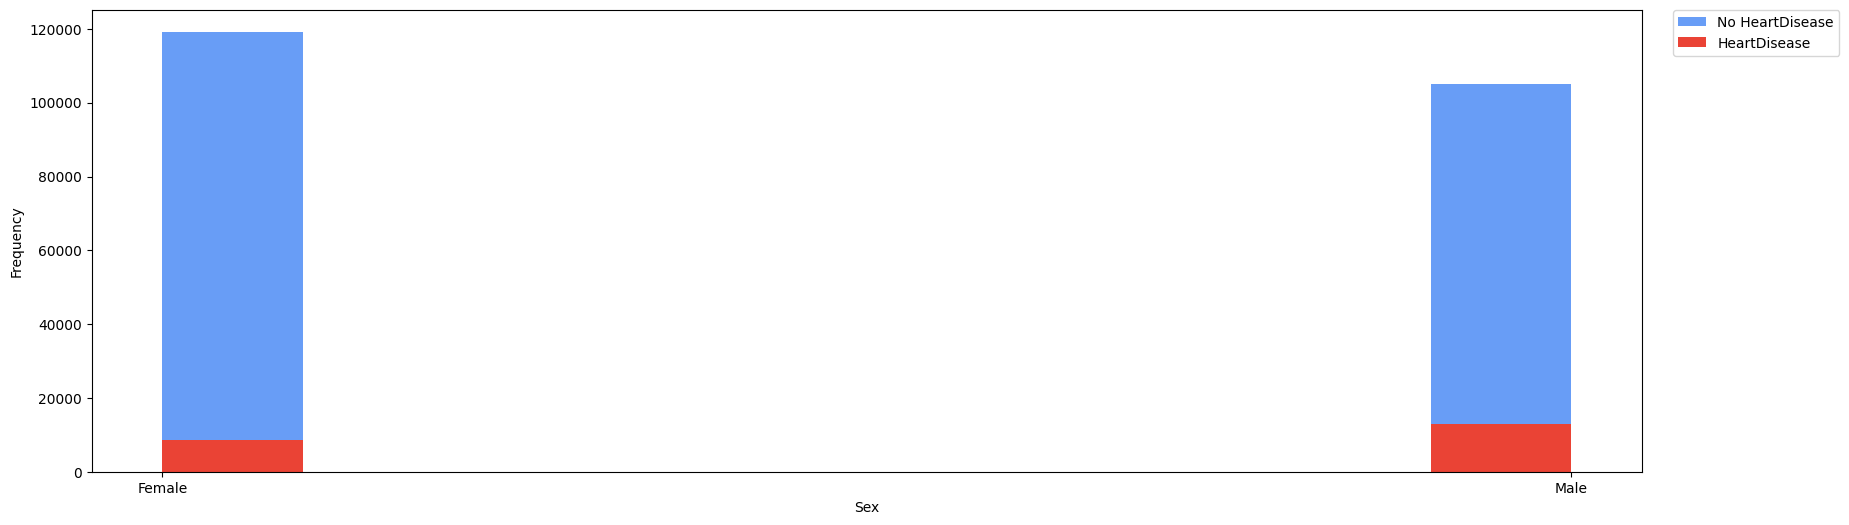

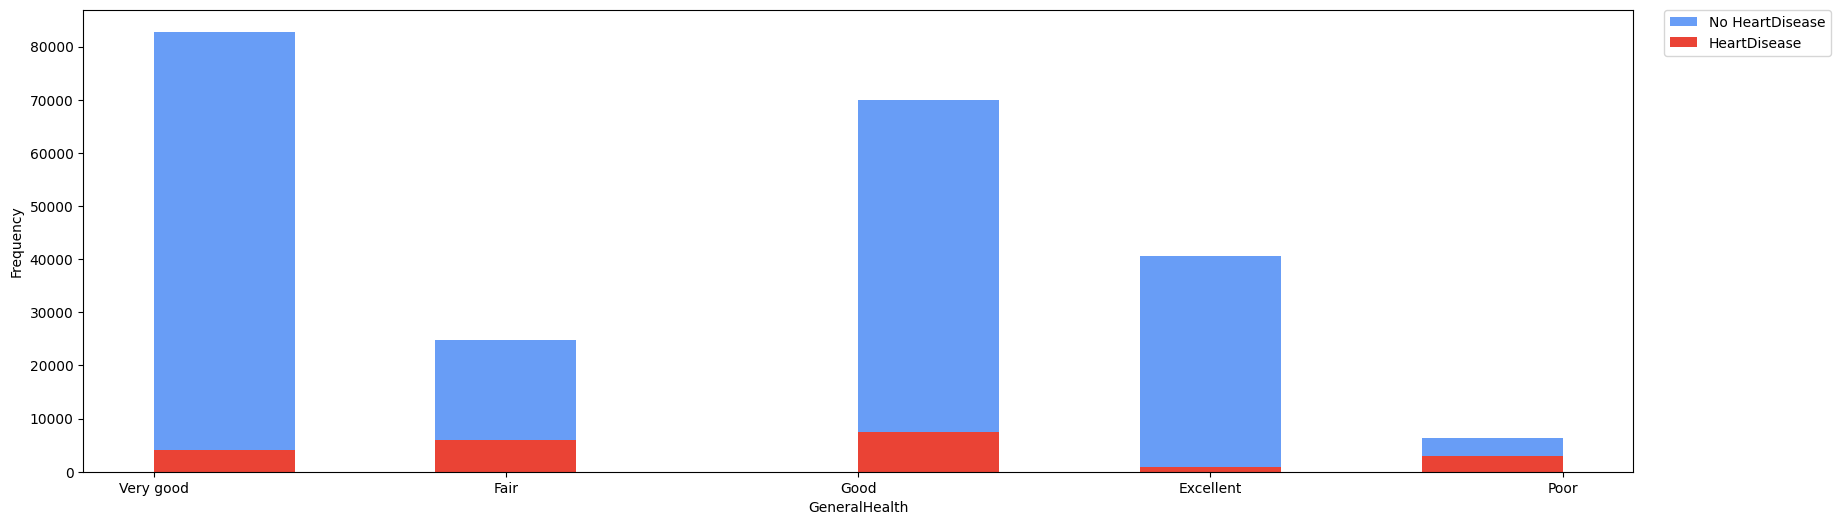

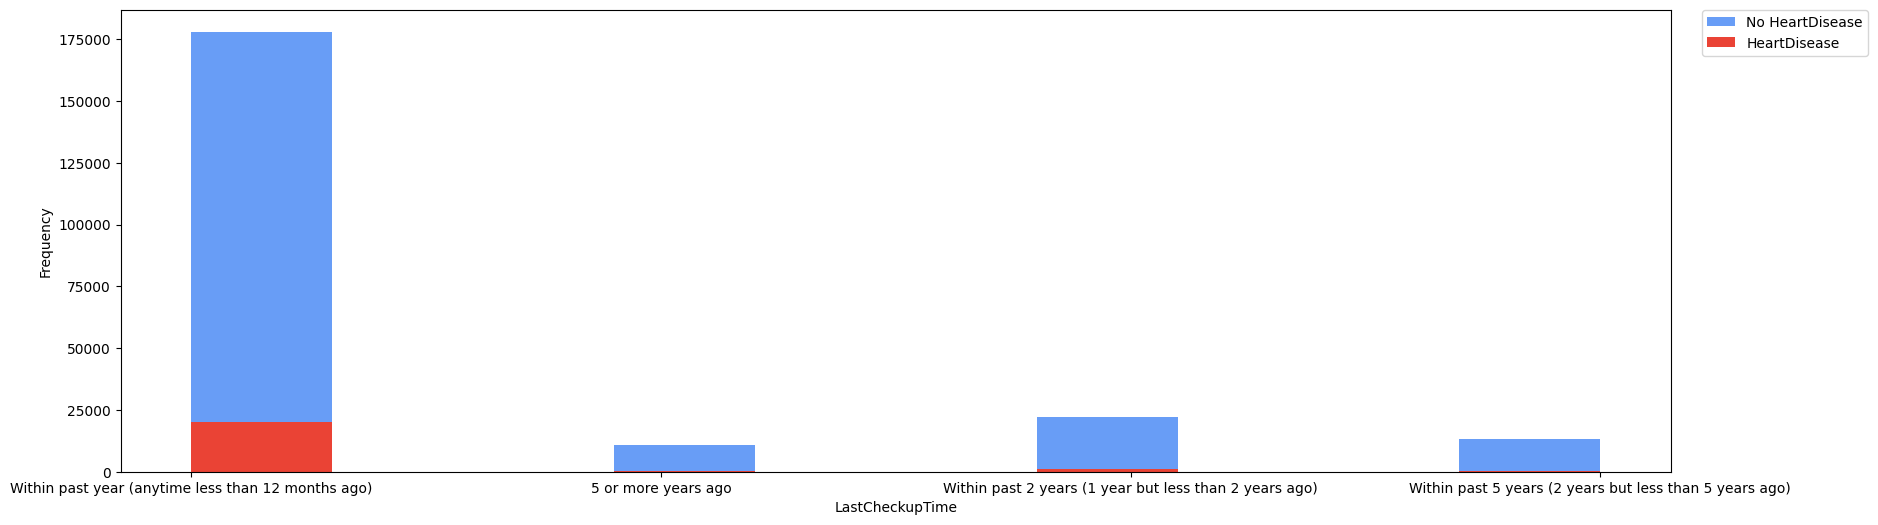

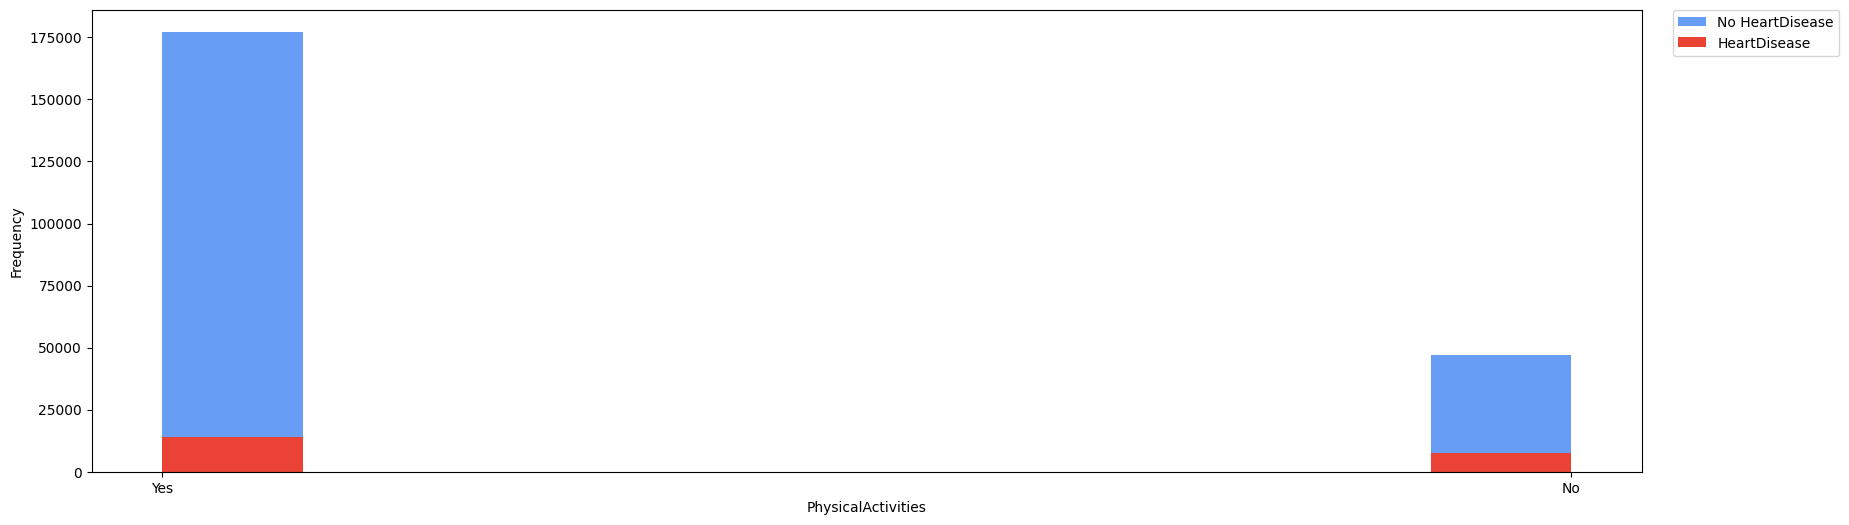

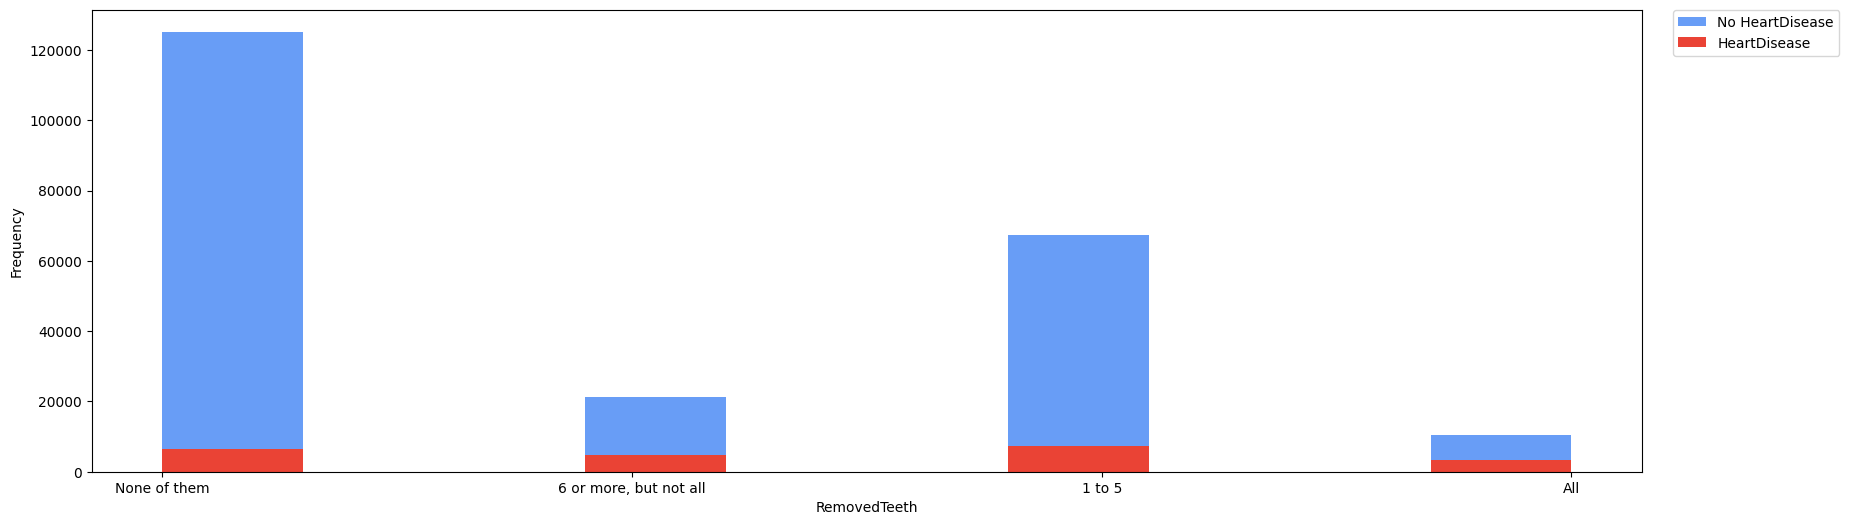

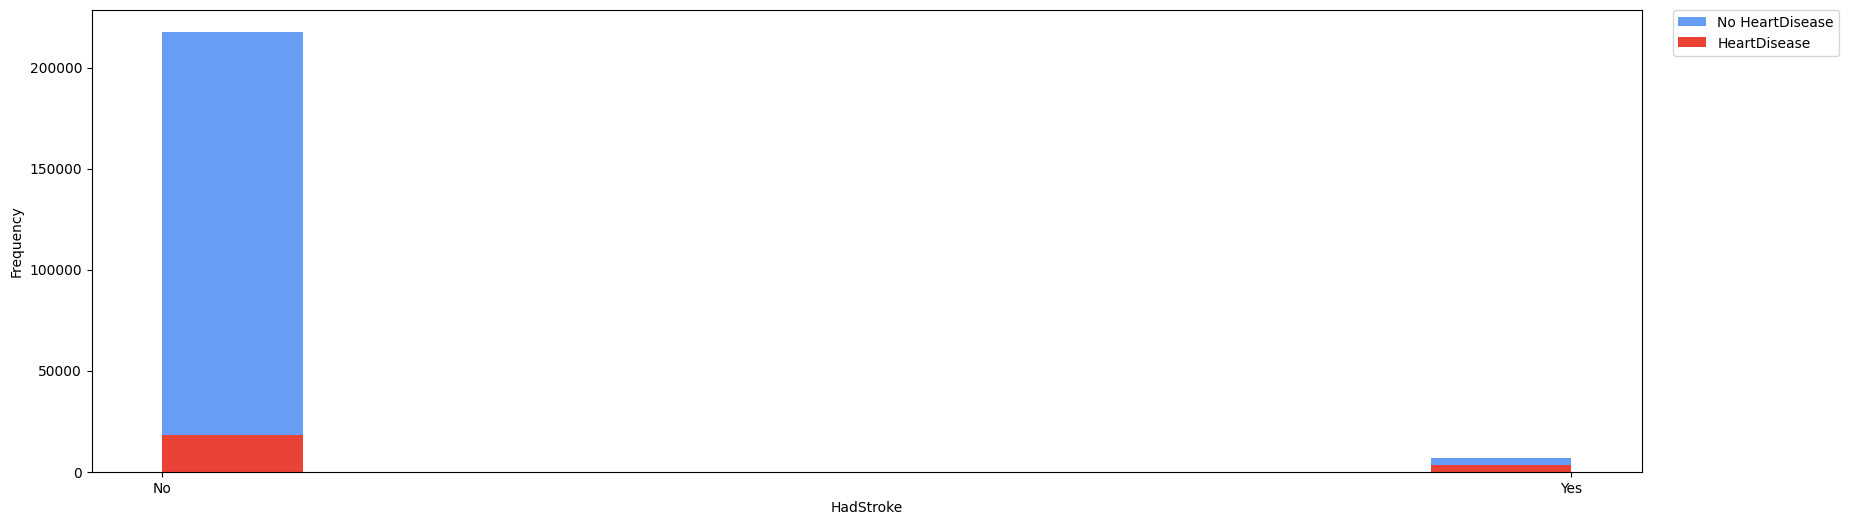

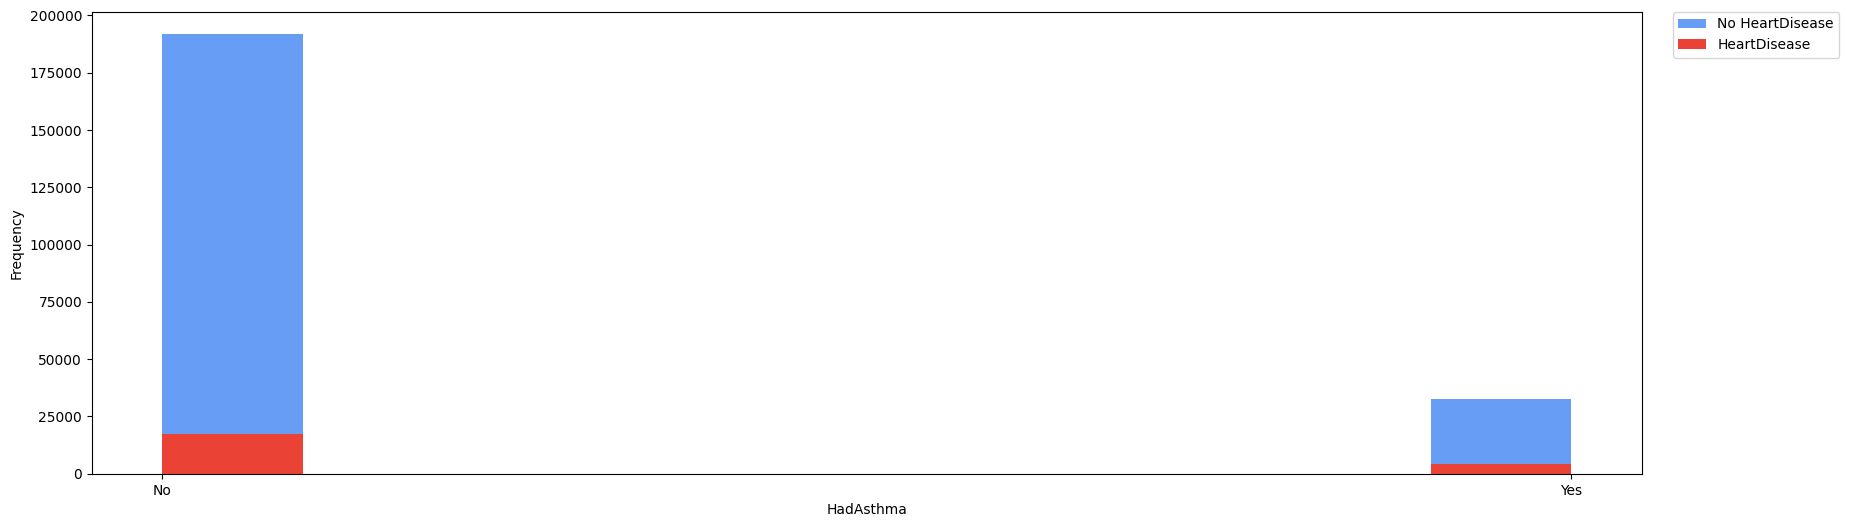

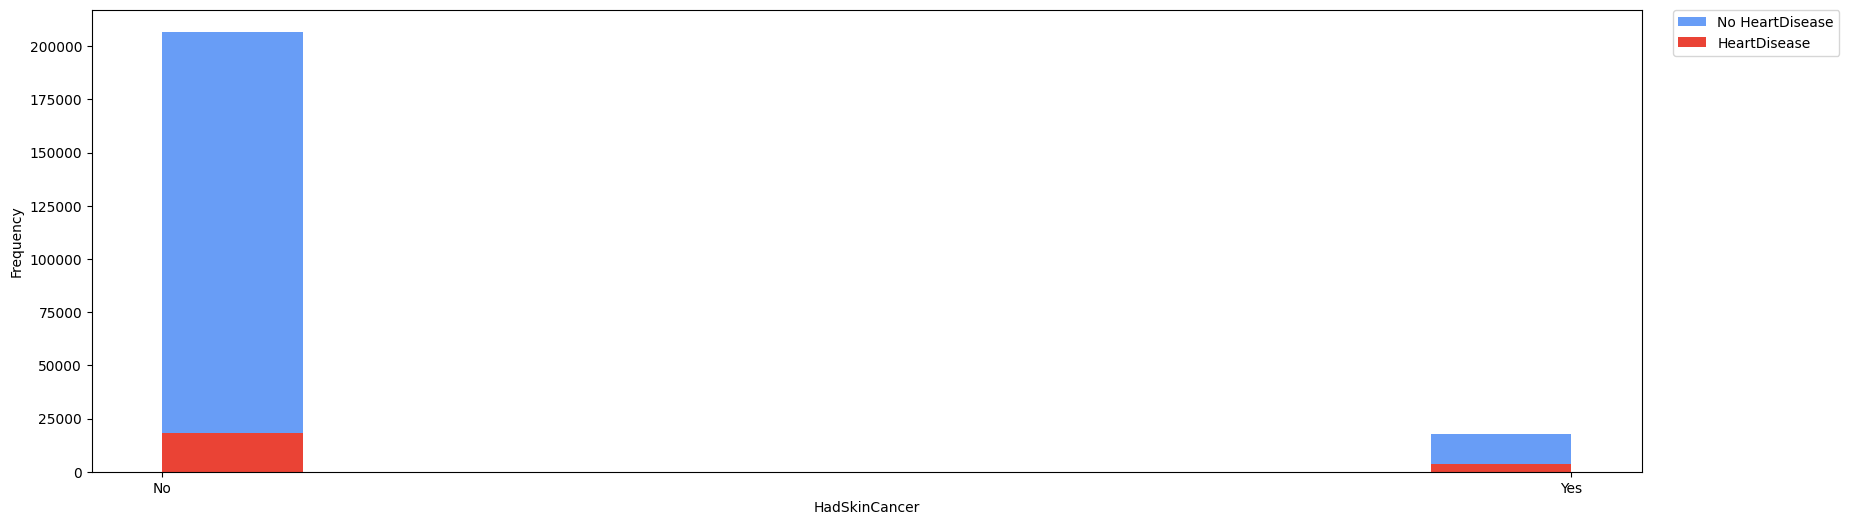

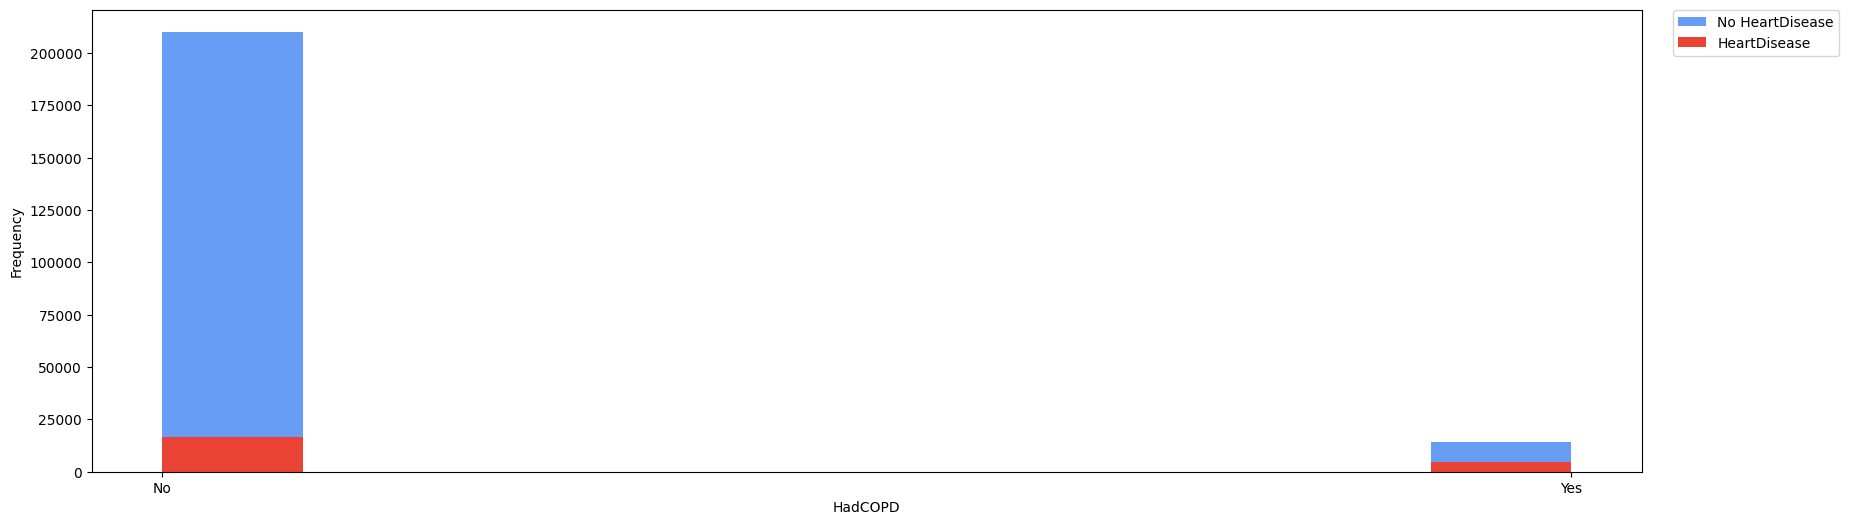

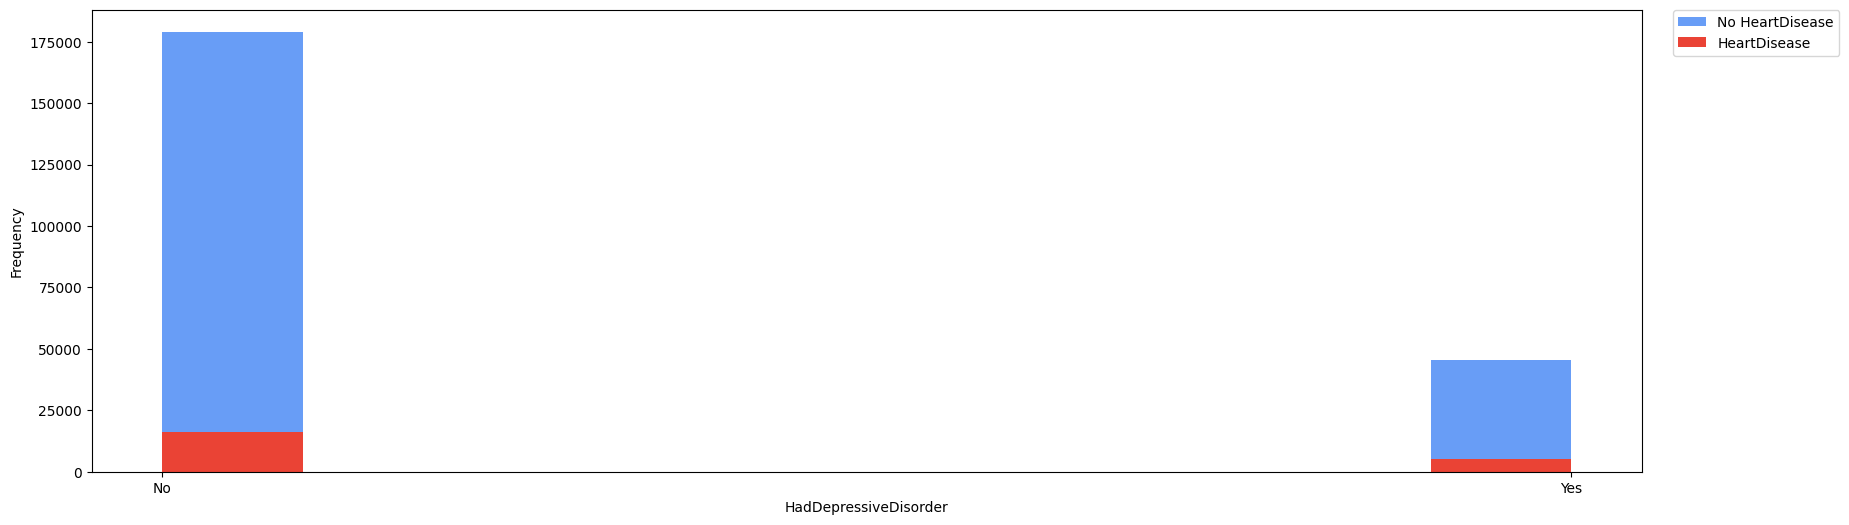

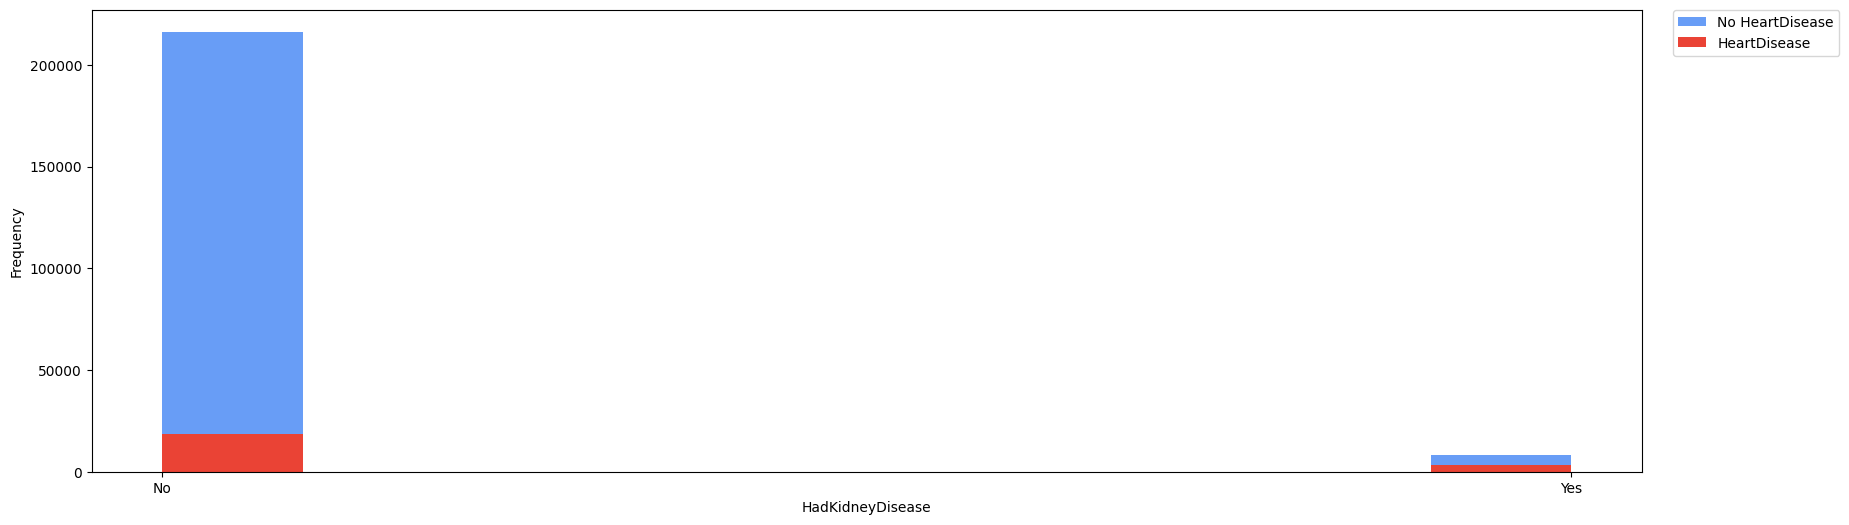

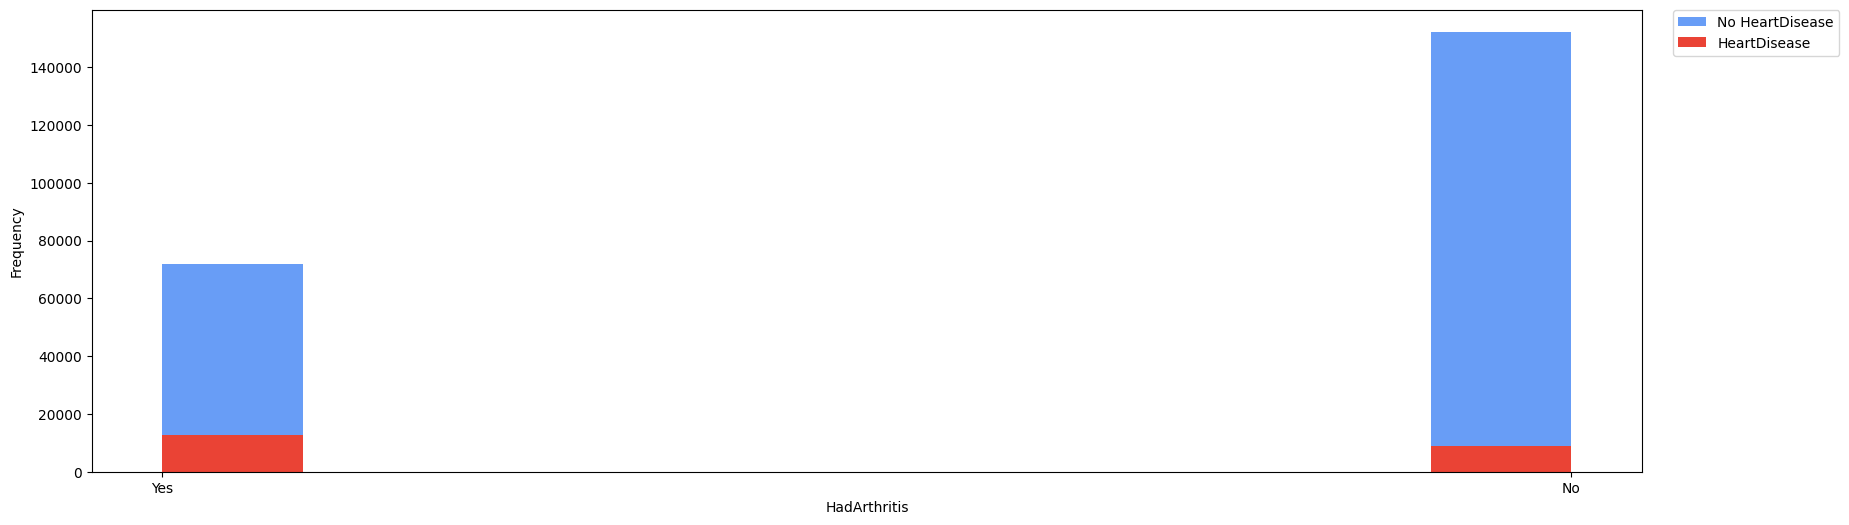

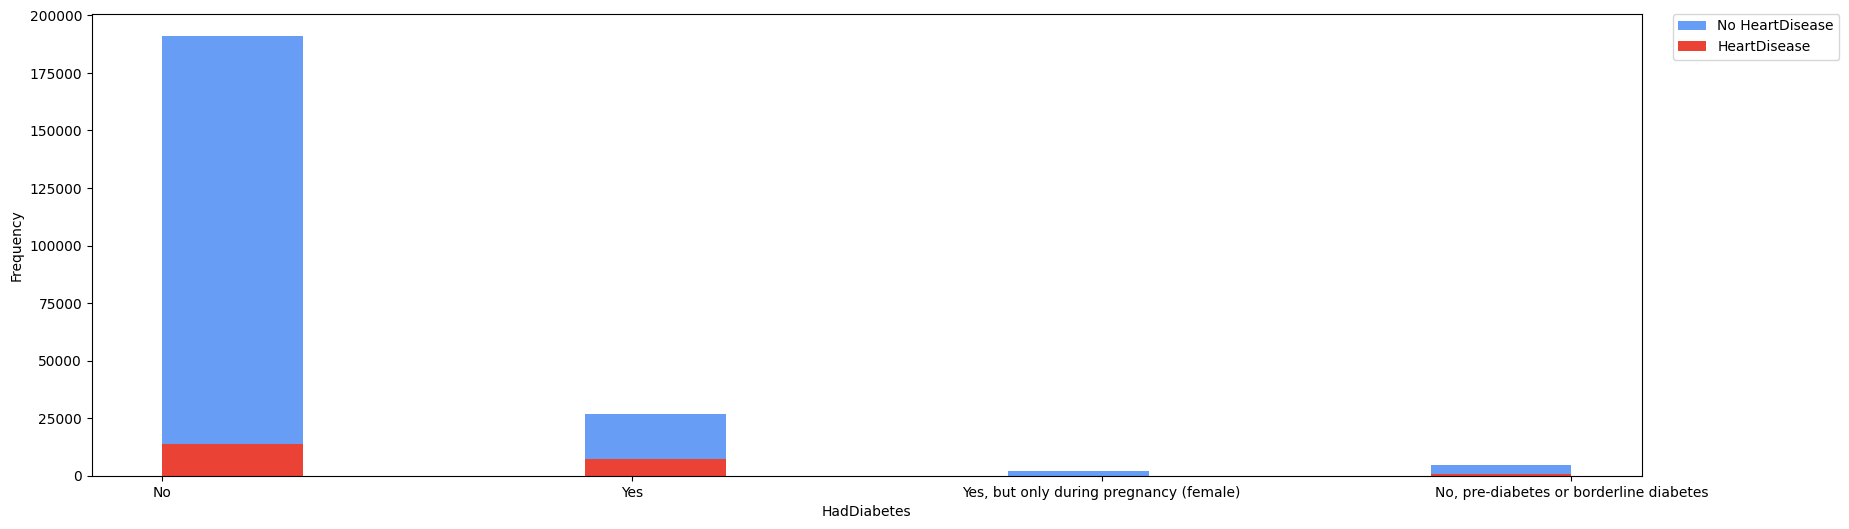

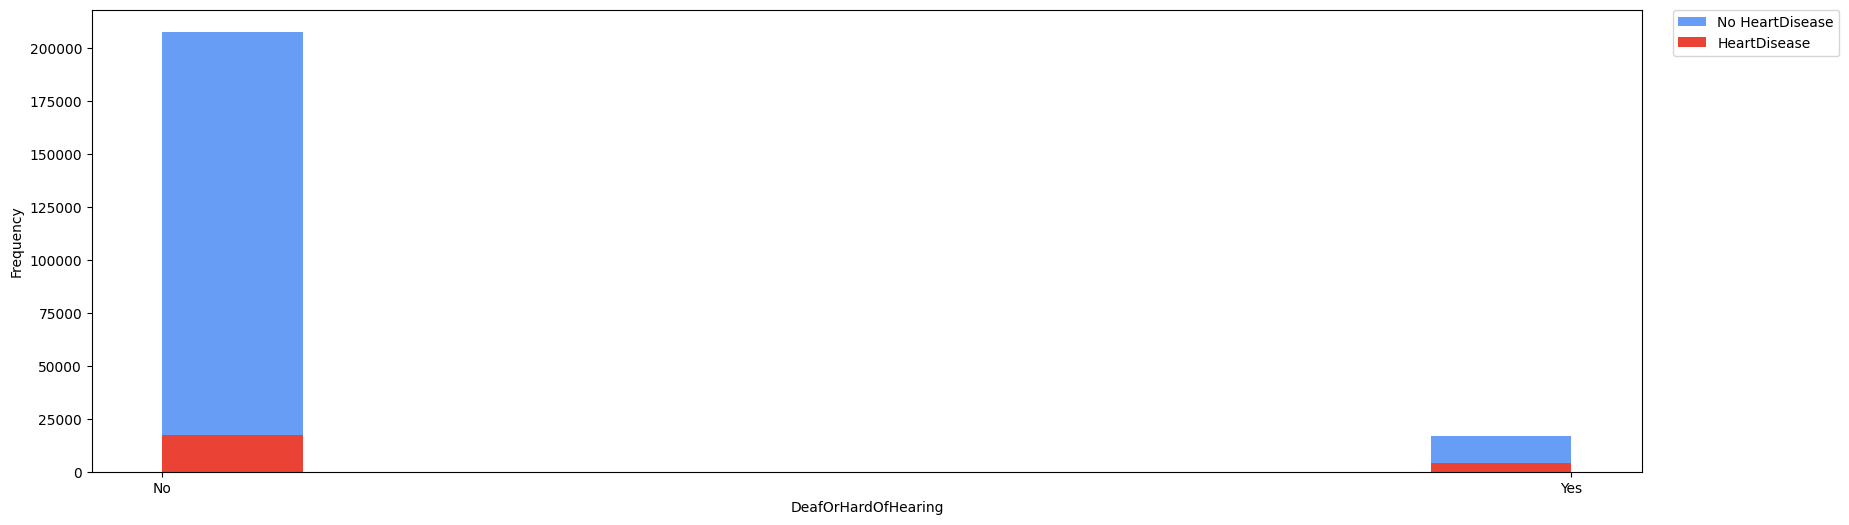

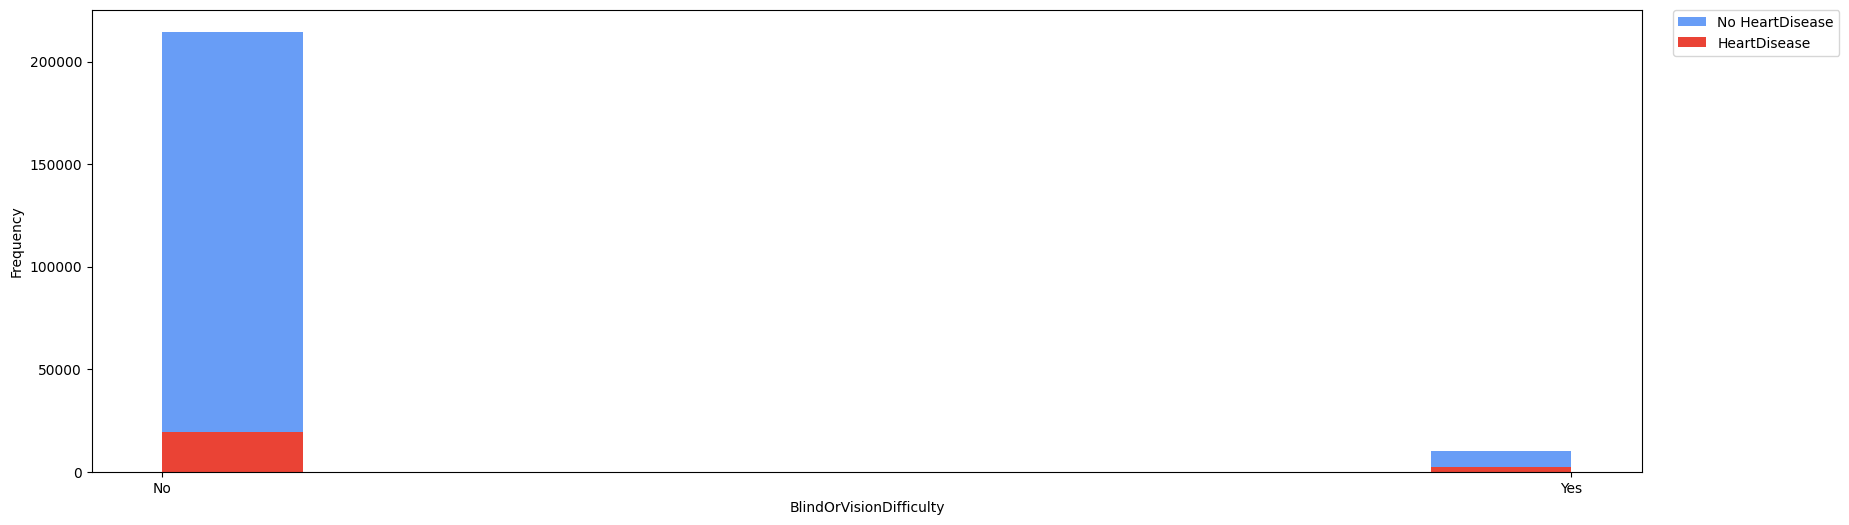

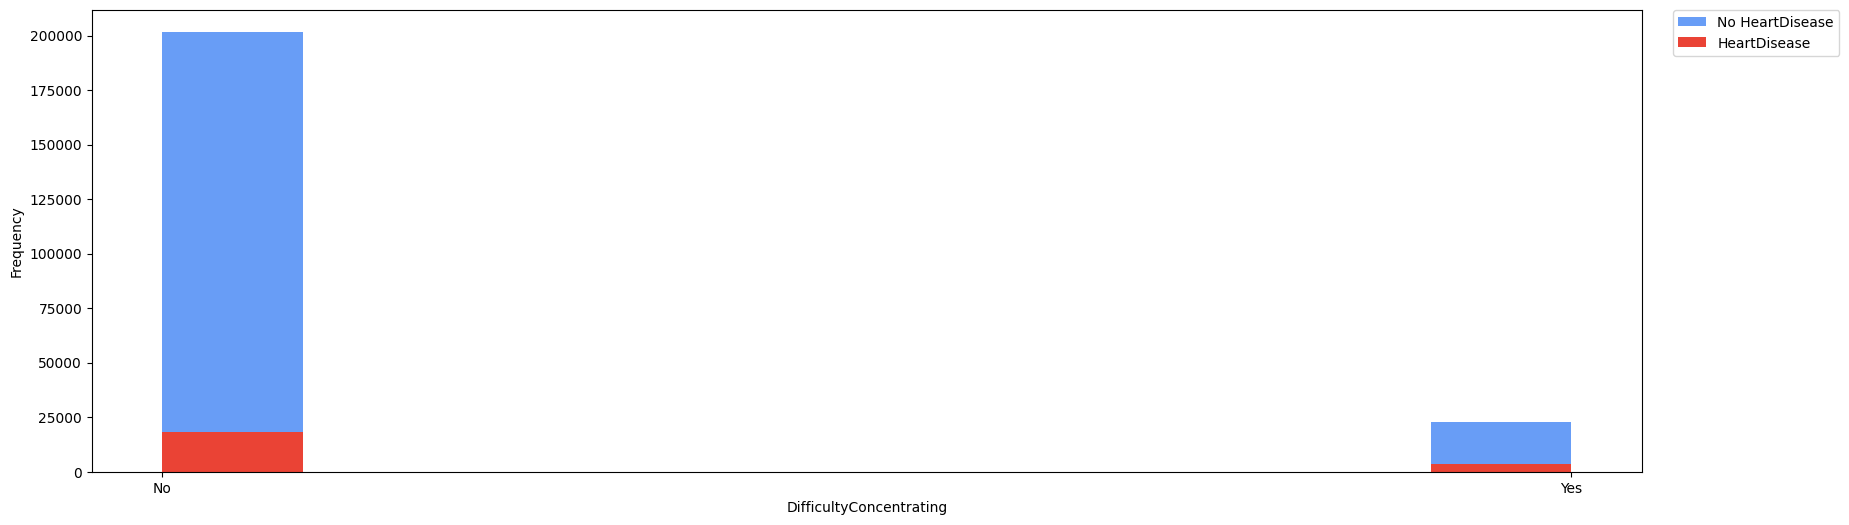

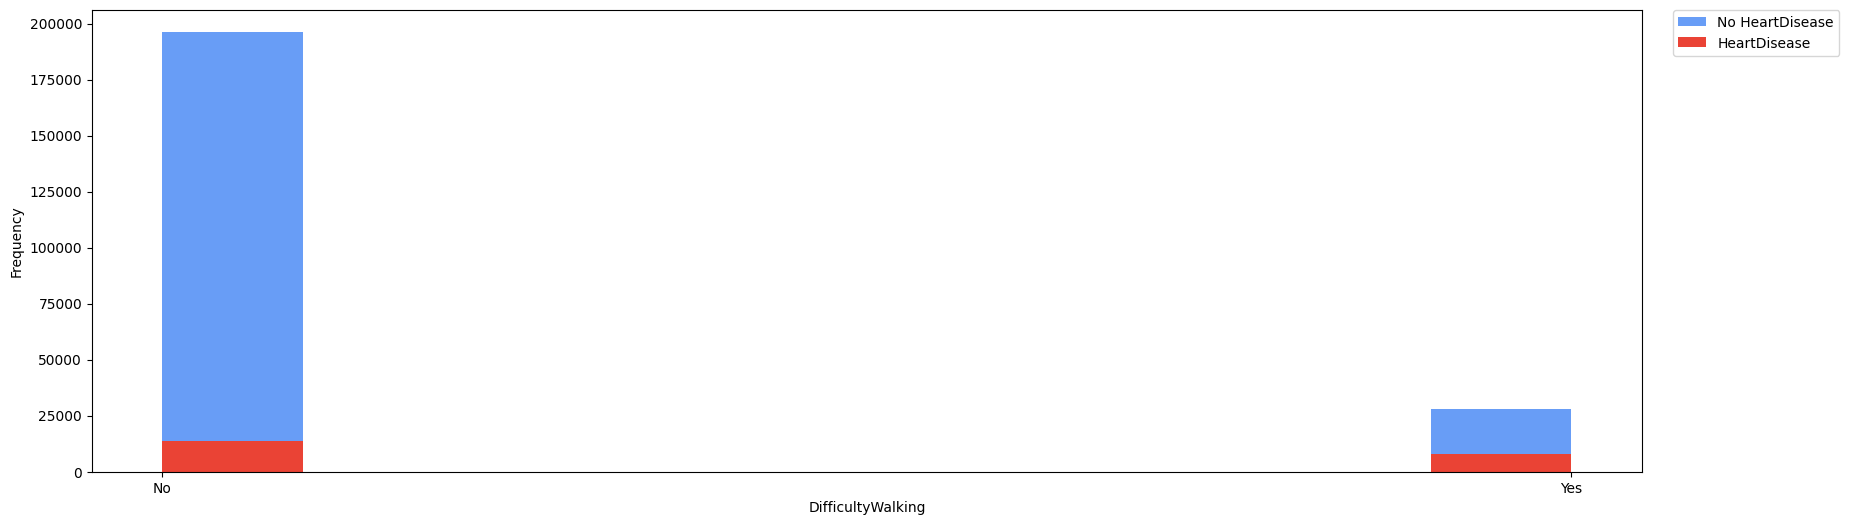

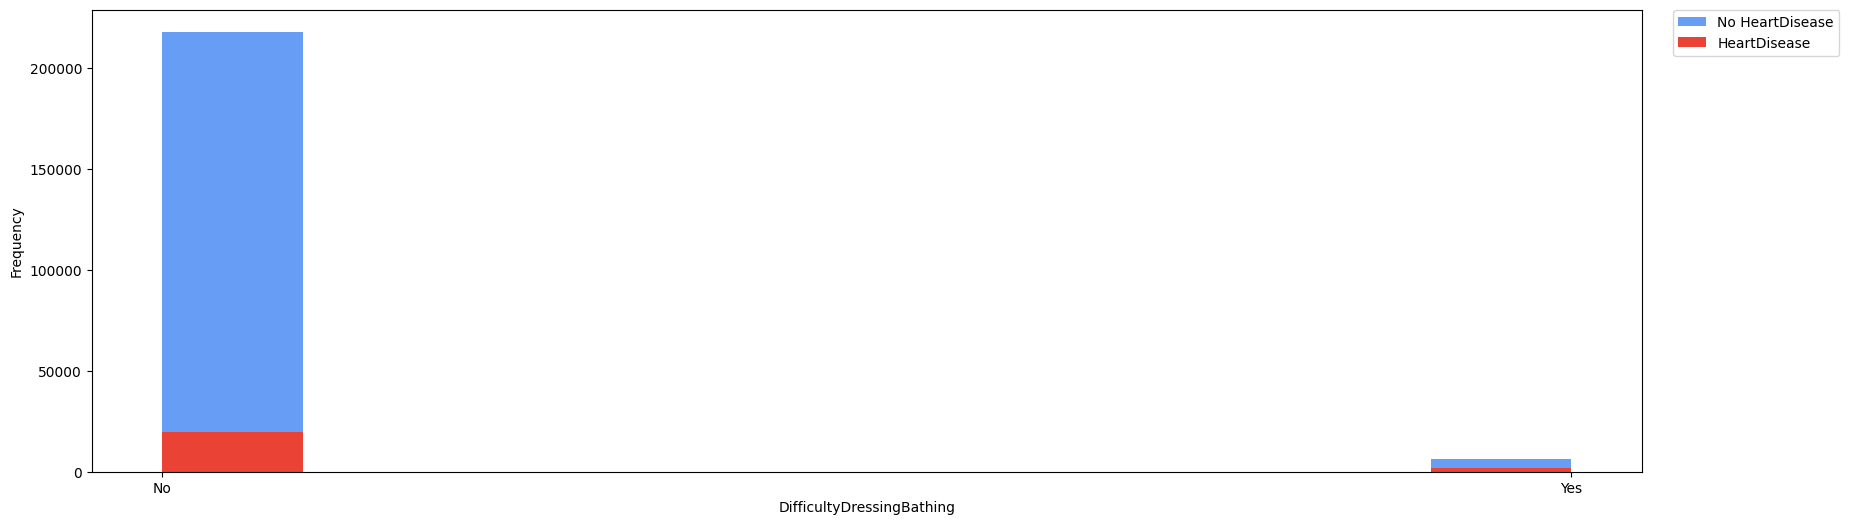

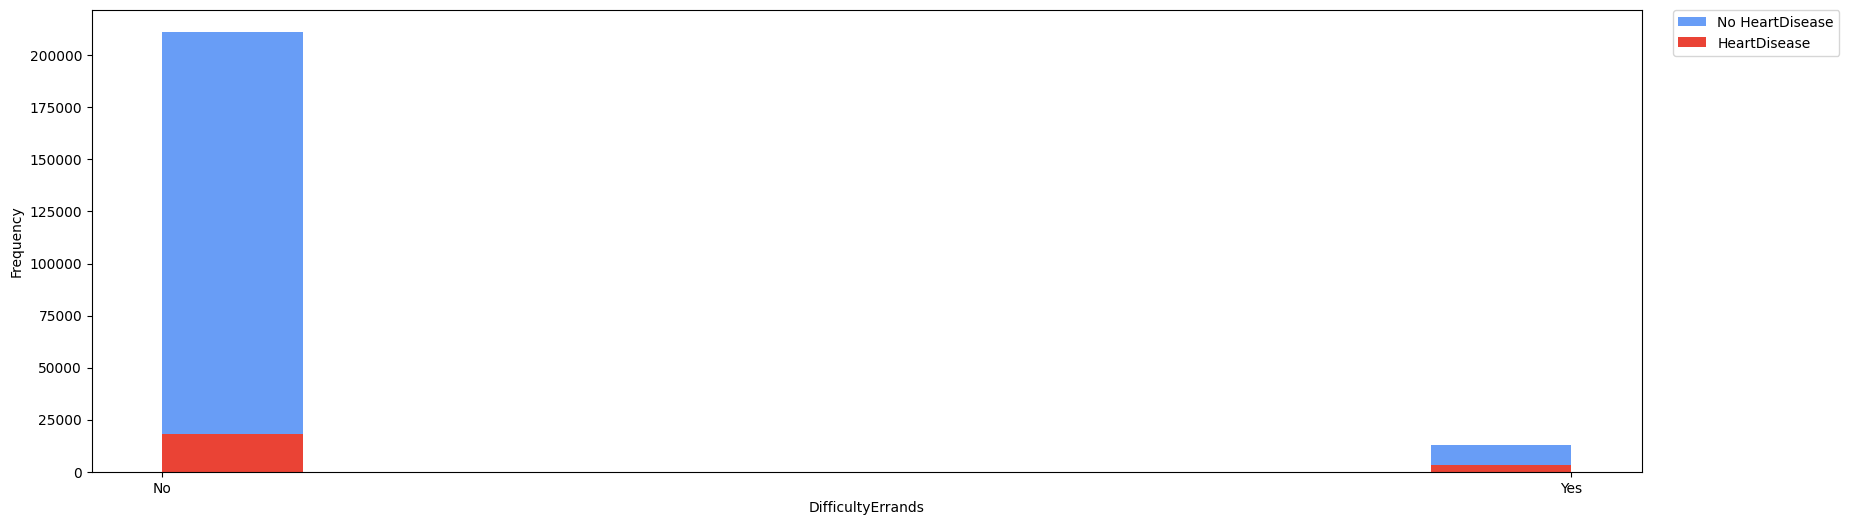

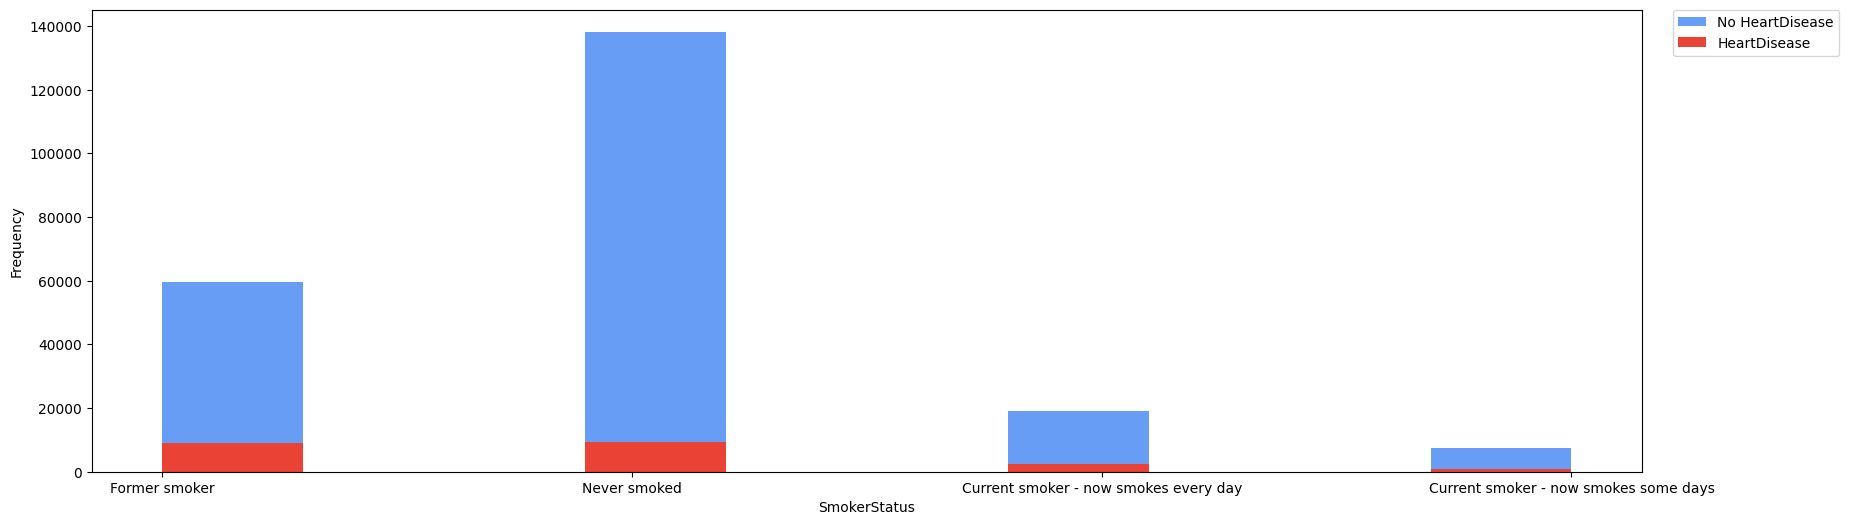

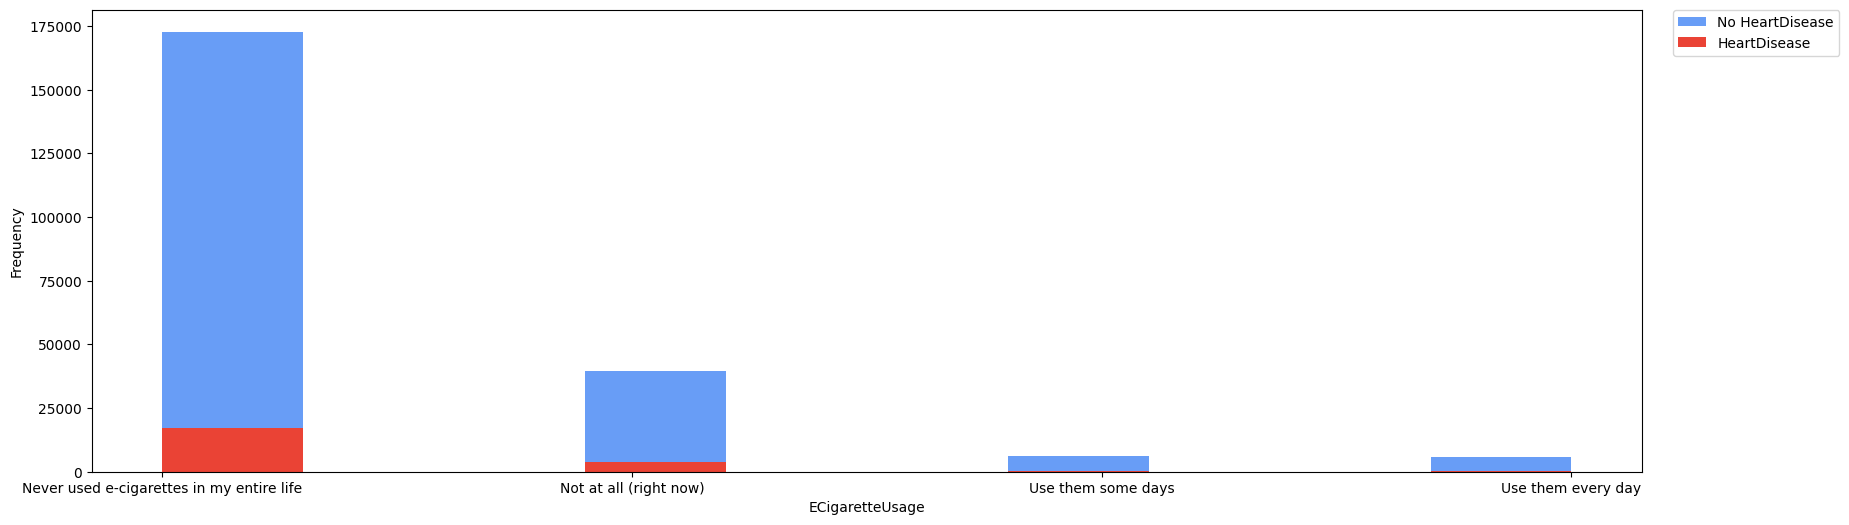

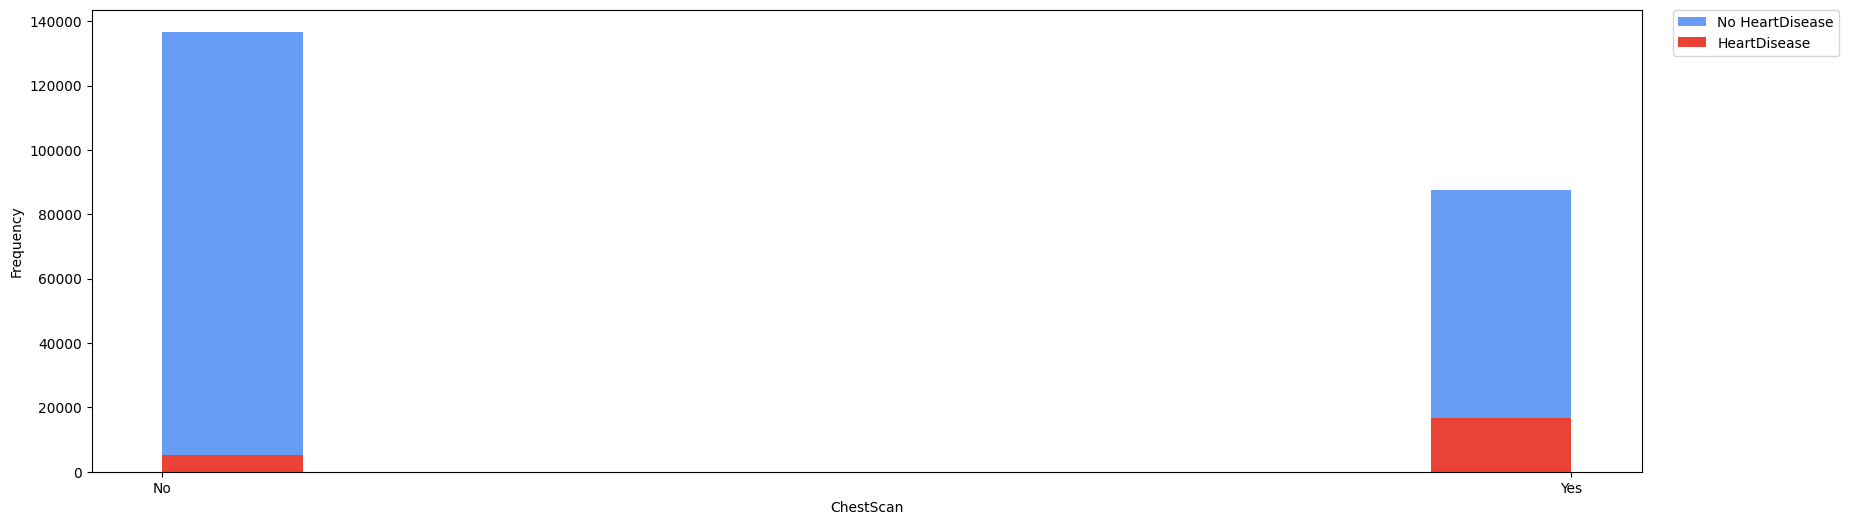

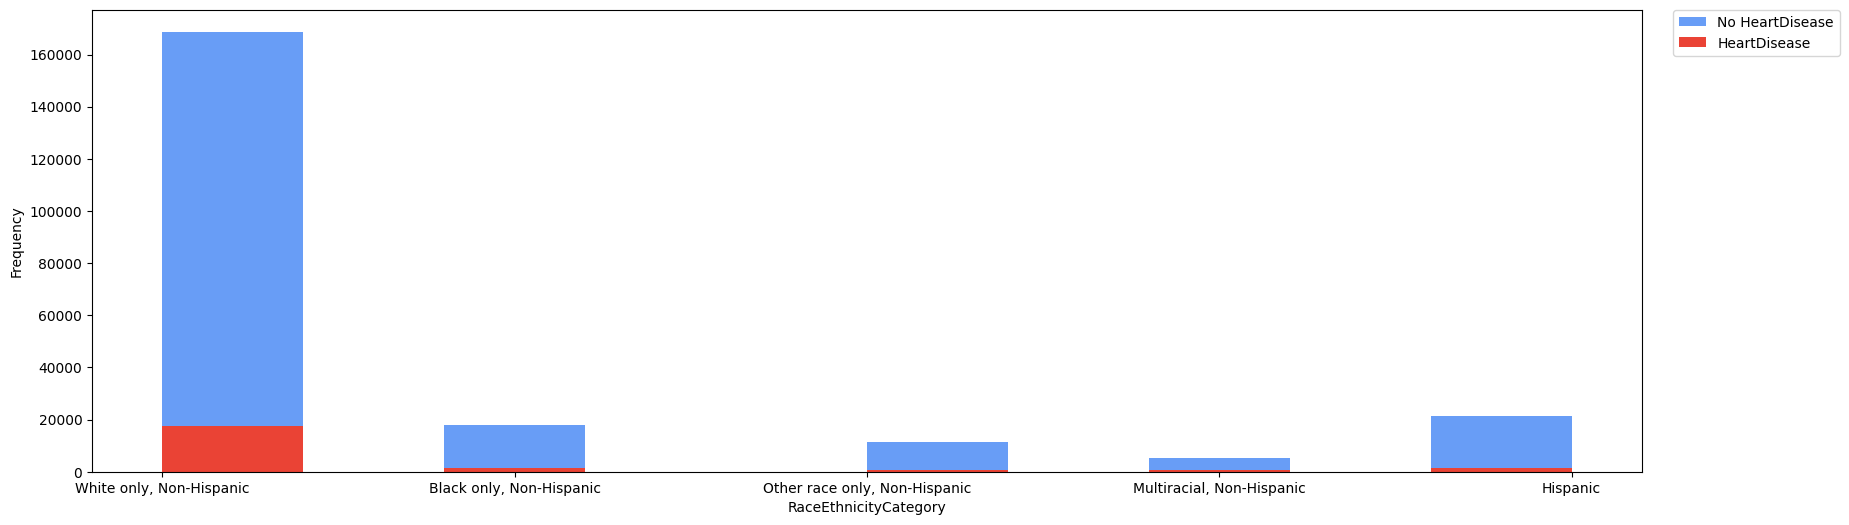

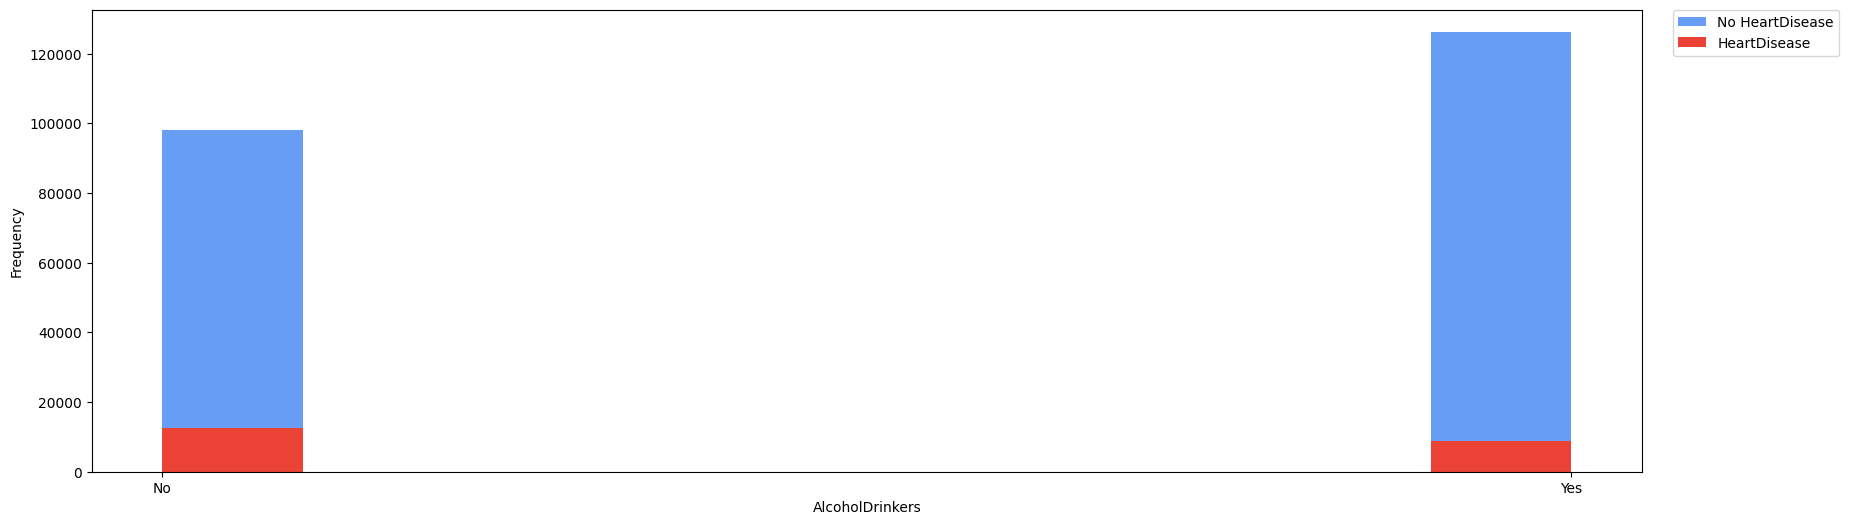

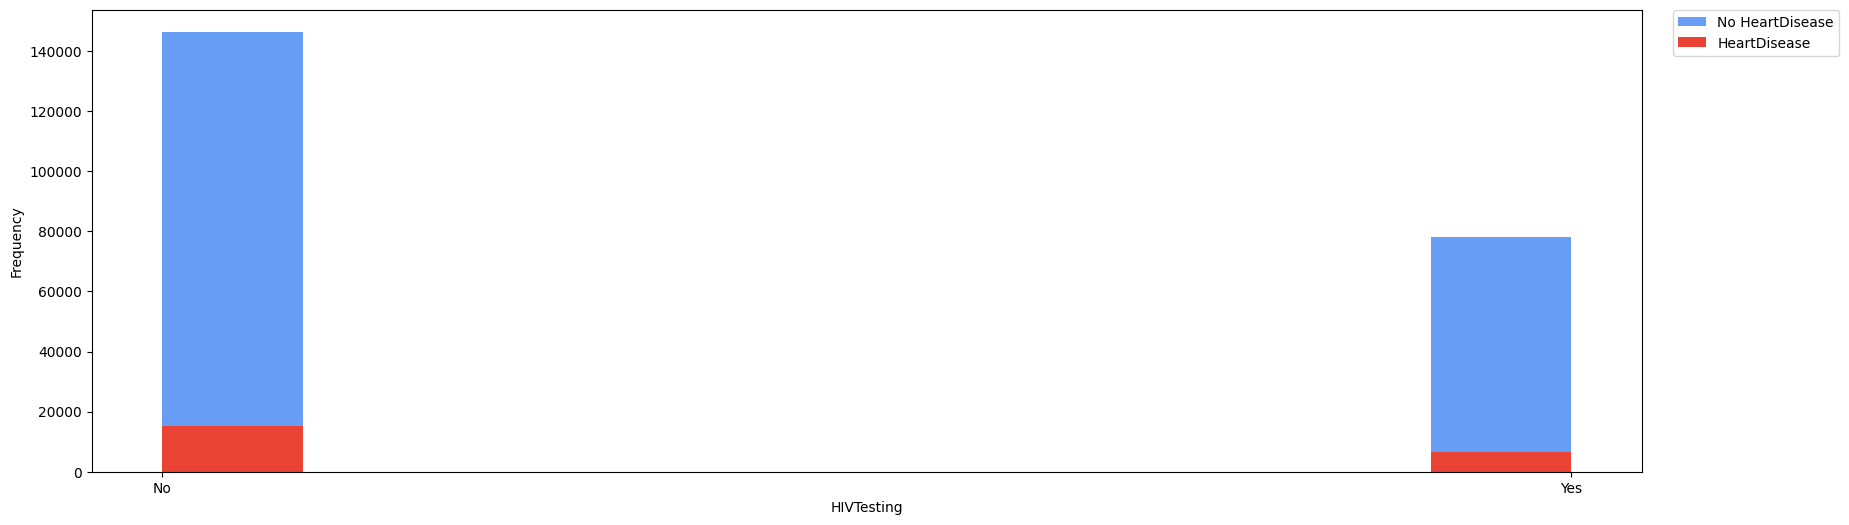

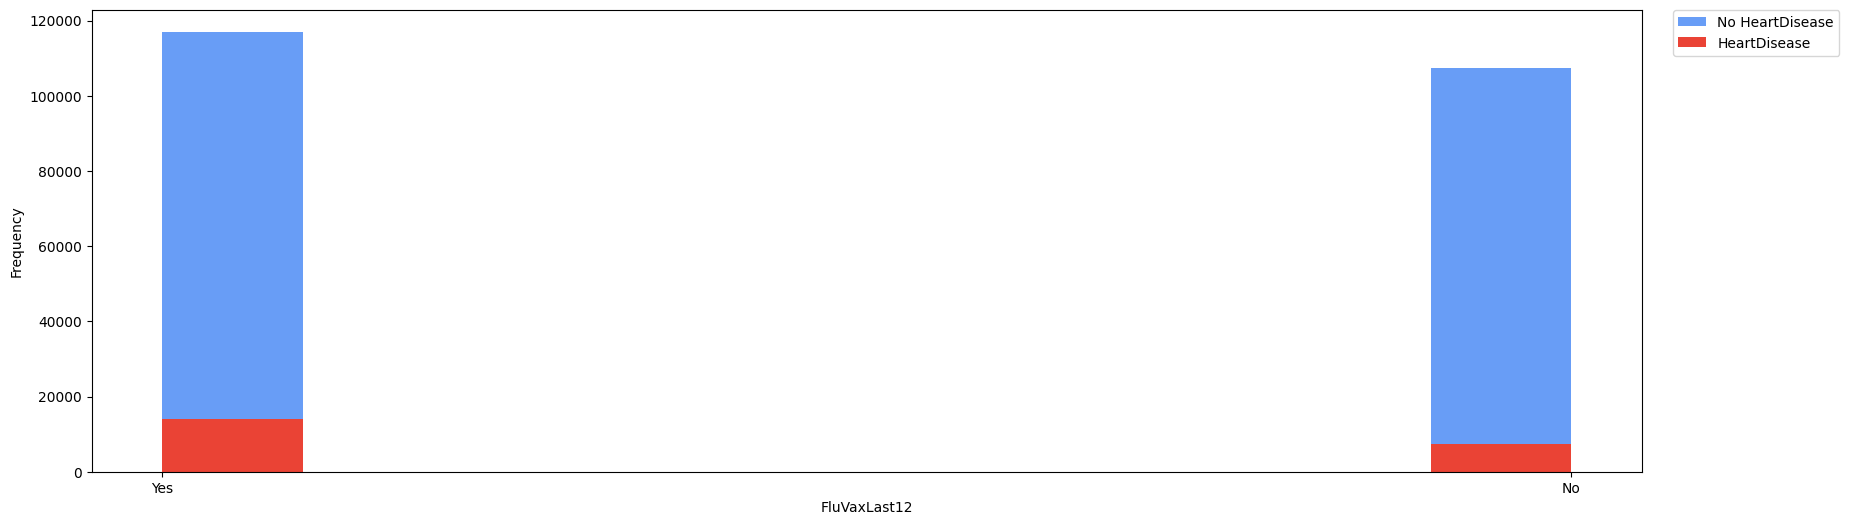

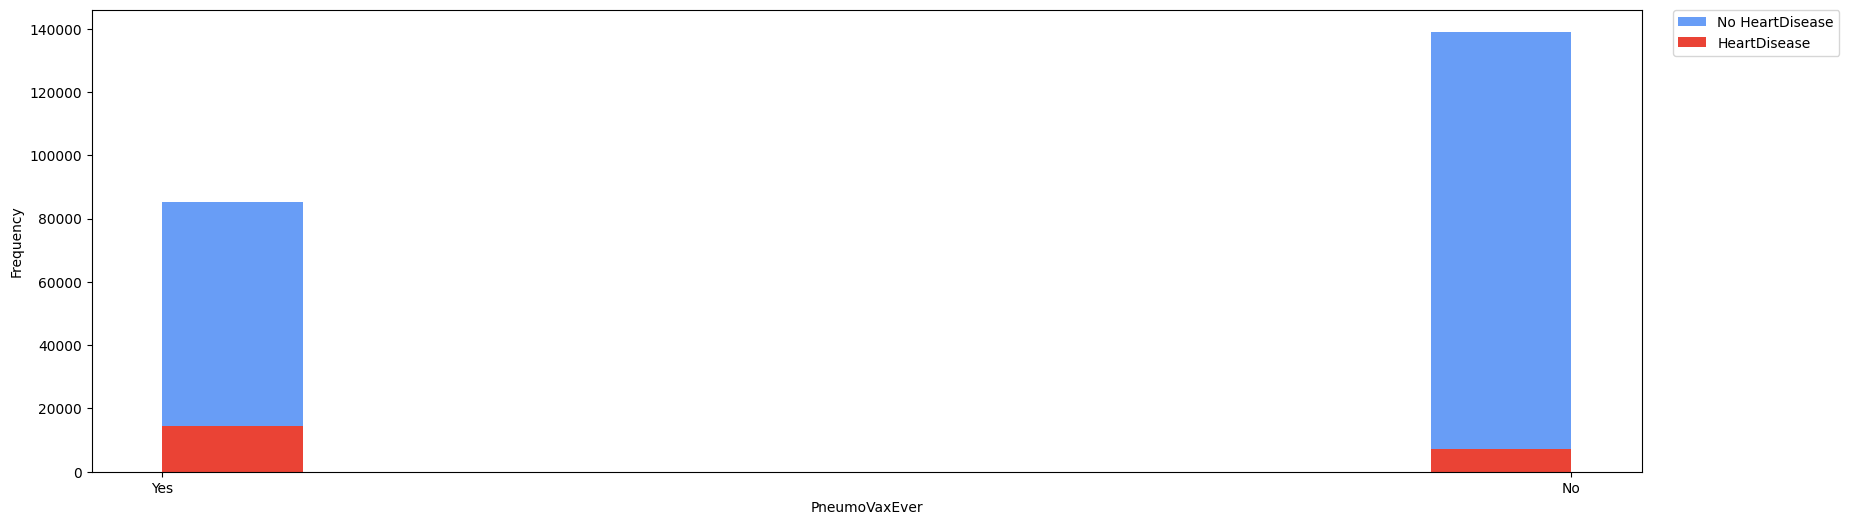

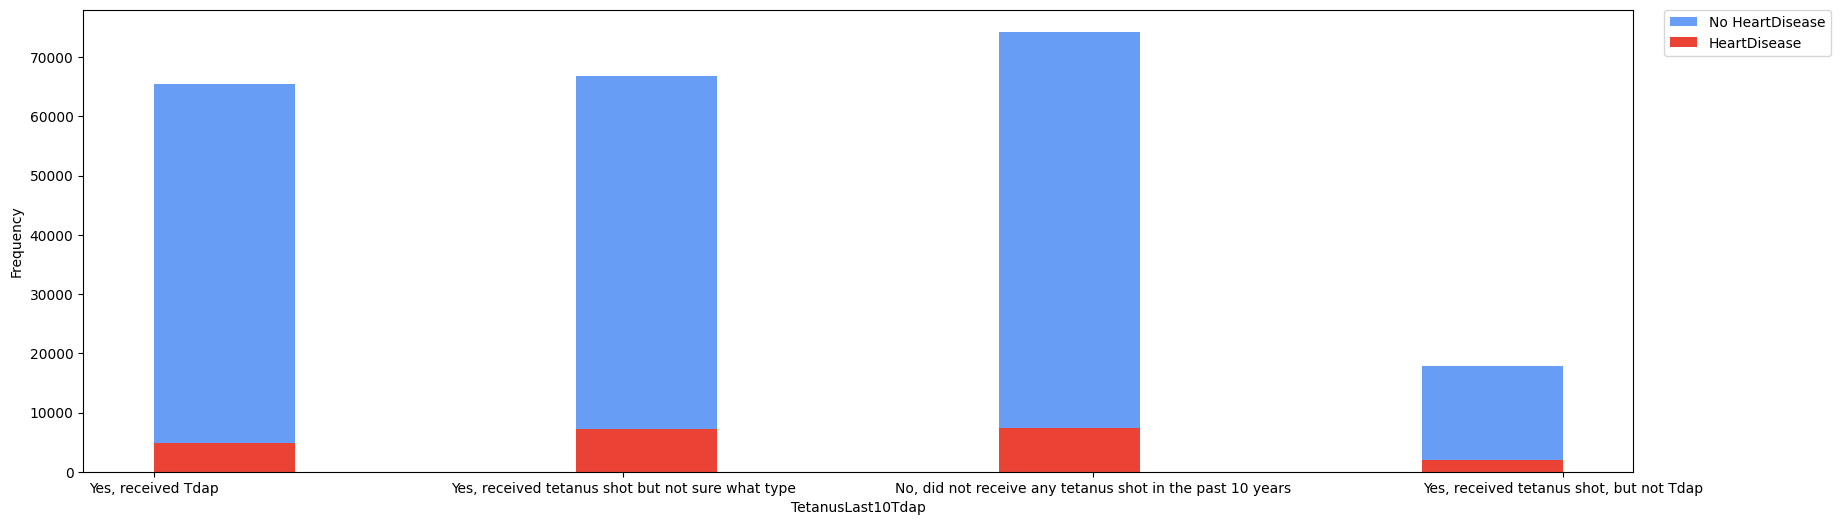

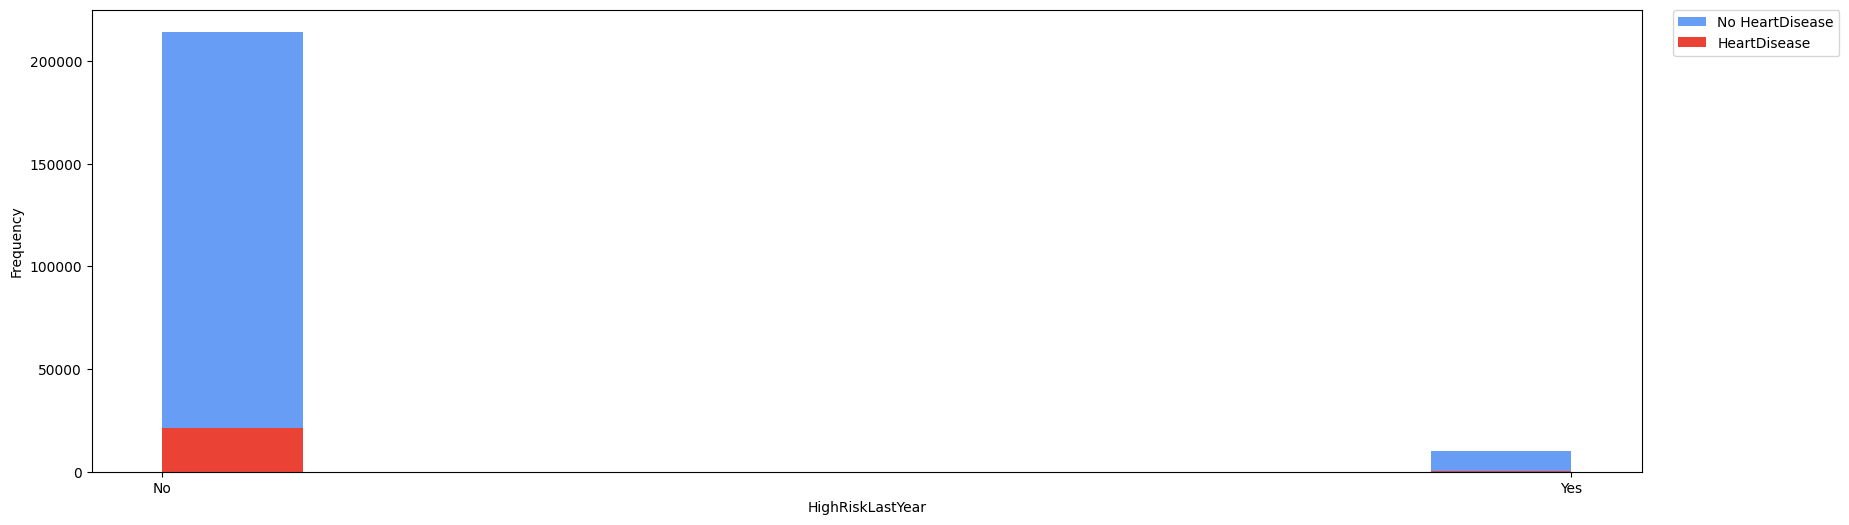

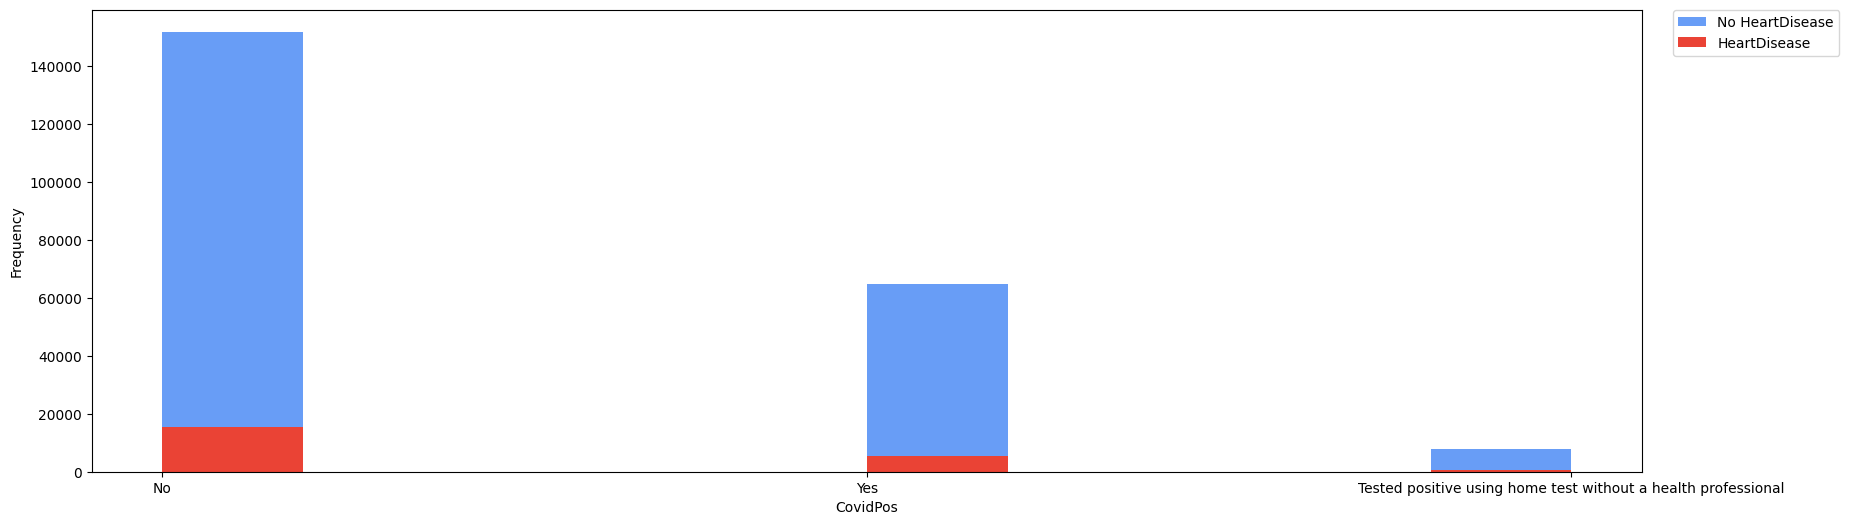

In [ ]:
for col in category_cols[1:]:
    fig, ax = plt.subplots(figsize = (20,6))

    ax.hist(df[df["HeartDisease"]==0][col],  alpha=0.8, color="#4285f4", label="No HeartDisease")
    ax.hist(df[df["HeartDisease"]==1][col],  alpha=1, color="#ea4335", label="HeartDisease")

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,False
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,False
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,False
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,False
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,False


In [ ]:
female_with_heart_disease = len(df[(df['HeartDisease']==1) & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']==1) & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('남자의 심장질환 확률:', male_with_heart_disease/num_male)
print('여자의 심장질환 확률:', female_with_heart_disease/num_female)

남자의 심장질환 확률: 0.11029430425256533
여자의 심장질환 확률: 0.06711472408478143


In [ ]:
health_good=len(df[df['GeneralHealth'].isin(['Good','Very good','Excellent'])])
health_fair=len(df[df['GeneralHealth']=='Fair'])
health_poor=len(df[df['GeneralHealth']=='Poor'])
health_good_heart_disease=len(df[(df['HeartDisease']==1) & (df['GeneralHealth'].isin(['Good','Very good','Excellent']))])
health_fair_heart_disease=len(df[(df['HeartDisease']==1) & (df['GeneralHealth']=='Fair')])
health_poor_heart_disease=len(df[(df['HeartDisease']==1) & (df['GeneralHealth']=='Poor')])
print('건강한 사람의 심장질환 확률:',health_good_heart_disease/health_good)
print('보통인 사람의 심장질환 확률:',health_fair_heart_disease/health_fair)
print('병약한 사람의 심장질환 확률:',health_poor_heart_disease/health_poor)

건강한 사람의 심장질환 확률: 0.06158313626276508
보통인 사람의 심장질환 확률: 0.19302651749893995
병약한 사람의 심장질환 확률: 0.31983032873807


In [ ]:
activity_yes=len(df[df['PhysicalActivities']=='Yes'])
activity_no=len(df[df['PhysicalActivities']=='No'])
activity_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['PhysicalActivities']=='Yes')])
activity_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['PhysicalActivities']=='No')])
print('운동한 사람의 심장질환 확률:',activity_yes_heart_disease/activity_yes)
print('운동하지 않은 사람의 심장질환 확률:',activity_no_heart_disease/activity_no)

운동한 사람의 심장질환 확률: 0.07334908372447967
운동하지 않은 사람의 심장질환 확률: 0.1386187481719801


In [ ]:
stroke_yes=len(df[df['HadStroke']=='Yes'])
stroke_no=len(df[df['HadStroke']=='No'])
stroke_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadStroke']=='Yes')])
stroke_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadStroke']=='No')])
print('뇌졸증을 겪은 사람의 심장질환 확률:',stroke_yes_heart_disease/stroke_yes)
print('뇌졸증을 겪지 않은 사람의 심장질환 확률:',stroke_no_heart_disease/stroke_no)

뇌졸증을 겪은 사람의 심장질환 확률: 0.3471123417721519
뇌졸증을 겪지 않은 사람의 심장질환 확률: 0.0767496079013183


In [ ]:
asthma_yes=len(df[df['HadAsthma']=='Yes'])
asthma_no=len(df[df['HadAsthma']=='No'])
asthma_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadAsthma']=='Yes')])
asthma_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadAsthma']=='No')])
print('천식을 겪은 사람의 심장질환 확률:',asthma_yes_heart_disease/asthma_yes)
print('천식을 겪지 않은 사람의 심장질환 확률:',asthma_no_heart_disease/asthma_no)

천식을 겪은 사람의 심장질환 확률: 0.1130608557584385
천식을 겪지 않은 사람의 심장질환 확률: 0.08346818270777544


In [ ]:
skincancer_yes=len(df[df['HadSkinCancer']=='Yes'])
skincancer_no=len(df[df['HadSkinCancer']=='No'])
skincancer_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadSkinCancer']=='Yes')])
skincancer_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadSkinCancer']=='No')])
print('피부암을 겪은 사람의 심장질환 확률:',skincancer_yes_heart_disease/skincancer_yes)
print('피부암을 겪지 않은 사람의 심장질환 확률:',skincancer_no_heart_disease/skincancer_no)

피부암을 겪은 사람의 심장질환 확률: 0.16226630512344797
피부암을 겪지 않은 사람의 심장질환 확률: 0.08091075150777108


In [ ]:
copd_yes=len(df[df['HadCOPD']=='Yes'])
copd_no=len(df[df['HadCOPD']=='No'])
copd_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadCOPD']=='Yes')])
copd_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadCOPD']=='No')])
print('코로나를 겪은 사람의 심장질환 확률:',copd_yes_heart_disease/copd_yes)
print('코로나를 겪지 않은 사람의 심장질환 확률:',copd_no_heart_disease/copd_no)

코로나를 겪은 사람의 심장질환 확률: 0.25244814151837425
코로나를 겪지 않은 사람의 심장질환 확률: 0.07409218246207516


In [ ]:
depressive_yes=len(df[df['HadDepressiveDisorder']=='Yes'])
depressive_no=len(df[df['HadDepressiveDisorder']=='No'])
depressive_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadDepressiveDisorder']=='Yes')])
depressive_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadDepressiveDisorder']=='No')])
print('우울증을 겪은 사람의 심장질환 확률:',depressive_yes_heart_disease/depressive_yes)
print('우울증을 겪지 않은 사람의 심장질환 확률:',depressive_no_heart_disease/depressive_no)

우울증을 겪은 사람의 심장질환 확률: 0.10491900434610826
우울증을 겪지 않은 사람의 심장질환 확률: 0.08344336291337857


In [ ]:
kidney_yes=len(df[df['HadKidneyDisease']=='Yes'])
kidney_no=len(df[df['HadKidneyDisease']=='No'])
kidney_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadKidneyDisease']=='Yes')])
kidney_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadKidneyDisease']=='No')])
print('신장질환을 겪은 사람의 심장질환 확률:',kidney_yes_heart_disease/kidney_yes)
print('신장질환을 겪지 않은 사람의 심장질환 확률:',kidney_no_heart_disease/kidney_no)

신장질환을 겪은 사람의 심장질환 확률: 0.2794221907125133
신장질환을 겪지 않은 사람의 심장질환 확률: 0.0786536478968041


In [ ]:
Arthritis_yes=len(df[df['HadArthritis']=='Yes'])
Arthritis_no=len(df[df['HadArthritis']=='No'])
Arthritis_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadArthritis']=='Yes')])
Arthritis_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadArthritis']=='No')])
print('관절염을 겪은 사람의 심장질환 확률:',Arthritis_yes_heart_disease/Arthritis_yes)
print('관절염을 겪지 않은 사람의 심장질환 확률:',Arthritis_no_heart_disease/Arthritis_no)

관절염을 겪은 사람의 심장질환 확률: 0.1511610098606317
관절염을 겪지 않은 사람의 심장질환 확률: 0.054518148927323616


In [ ]:
Diabetes_yes=len(df[df['HadDiabetes']=='Yes'])
Diabetes_no=len(df[df['HadDiabetes']=='No'])
Diabetes_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadDiabetes']=='Yes')])
Diabetes_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['HadDiabetes']=='No')])
print('당뇨병을 겪은 사람의 심장질환 확률:',Diabetes_yes_heart_disease/Diabetes_yes)
print('당뇨병을 겪지 않은 사람의 심장질환 확률:',Diabetes_no_heart_disease/Diabetes_no)

당뇨병을 겪은 사람의 심장질환 확률: 0.21190074823292818
당뇨병을 겪지 않은 사람의 심장질환 확률: 0.06694201158010878


In [ ]:
smoke_yes=len(df[df['SmokerStatus'].isin(['Current smoker - now smokes some days','Former smoker','Current smoker - now smokes every day'])])
smoke_no=len(df[df['SmokerStatus']=='Never smoked'])
smoke_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['SmokerStatus'].isin(['Current smoker - now smokes some days','Former smoker','Current smoker - now smokes every day']))])
smoke_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['SmokerStatus']=='Never smoked')])
print('흡연자의 심장질환 확률:',smoke_yes_heart_disease/smoke_yes)
print('비흡연자의 심장질환 확률:',smoke_no_heart_disease/smoke_no)

흡연자의 심장질환 확률: 0.12352851401536348
비흡연자의 심장질환 확률: 0.06413423854552347


In [ ]:
ECigaretteUsage_yes=len(df[df['ECigaretteUsage'].isin(['Use them every day','Use them some days','Not at all (right now)'])])
ECigaretteUsage_no=len(df[df['ECigaretteUsage']=='Never used e-cigarettes in my entire life'])
ECigaretteUsage_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['ECigaretteUsage'].isin(['Use them every day','Use them some days','Not at all (right now)']))])
ECigaretteUsage_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['ECigaretteUsage']=='Never used e-cigarettes in my entire life')])
print('전자담배 흡연자의 심장질환 확률:',ECigaretteUsage_yes_heart_disease/ECigaretteUsage_yes)
print('전자담배 비흡연자의 심장질환 확률:',ECigaretteUsage_no_heart_disease/ECigaretteUsage_no)

전자담배 흡연자의 심장질환 확률: 0.07716391741510717
전자담배 비흡연자의 심장질환 확률: 0.091007110998906


In [ ]:
AlcoholDrinkers_yes=len(df[df['AlcoholDrinkers']=='Yes'])
AlcoholDrinkers_no=len(df[df['AlcoholDrinkers']=='No'])
AlcoholDrinkers_yes_heart_disease=len(df[(df['HeartDisease']==1) & (df['AlcoholDrinkers']=='Yes')])
AlcoholDrinkers_no_heart_disease=len(df[(df['HeartDisease']==1) & (df['AlcoholDrinkers']=='No')])
print('음주경험이 있는 사람의 심장질환 확률:',AlcoholDrinkers_yes_heart_disease/AlcoholDrinkers_yes)
print('음주경험이 없는 사람의 심장질환 확률:',AlcoholDrinkers_no_heart_disease/AlcoholDrinkers_no)

음주경험이 있는 사람의 심장질환 확률: 0.06624195348355962
음주경험이 없는 사람의 심장질환 확률: 0.11428442397145824


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if len(df[col].unique())<=2:
        df[col]=le.fit_transform(df[col])
    else:
        df=pd.get_dummies(df,columns=[col])

In [ ]:
df.head()

,Sex,PhysicalActivities,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,...,BMI_96.2,BMI_97.43,BMI_97.65,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
343,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
345,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
346,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
347,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
